# Abstract: 
A comparative analysis of top 5 grossing health/wellness apps - **Natural Laguage Processing (NLP) and linear Support Vector Classification** for positive and negative sentiment analysis.  **Latent Dirchilet Application (LDA) clustering for deep sentiment analysis** to inform best practices and growth opportunities the world of wellness apps. 

**Business Case/Problem**
App reviews can convert into revenues - higher rated apps are more attractive to reviewers.  Gaining insight from these reviews can provide business intelligence for process improvements and future iterations of products. 

**Methodology**
Natural Language Processing was used to prepare text and a multinomal linear Support Vector Classification model was applied to identify positive and negative reviews with 80 and 90% recall and 75% accuracy.  While language used to identify positive an negative reviews like 'awesome' and 'horrible' in the classifier, they proved to be not useful to identify business insights for improvements and how best to maximize existing offerings. If these terms were stripped from the corpus, model performance decreased.  The highest and lowest rating reviews were analyzed separately with non-informative adjectives removed.  Various methodologies were used for sentiment analysis including KMeans Clustering, visualization and Latent Dirichlet Allocation or LDA were experimented with.  LDA provided the greatest insights to what reviewers were talking about and details and an interactive tool can be found in the Negative Reviews section and Positive Reviews sections of the notebook.  

**Findings**
In the positive reviews, 4 main areas were identified in order of importance: Well-Being, Information, Ease of Use, and Weight-Loss
In the negative reviews, 3 main areas were identified in order of imporance: Technical, Billing Terms, and Ease of Use

These findings would support the following **recommendations** for health/wellness app makers:
* Exploit app-specific features
* Improve access to relevant information
* Resolve technical issues, syncing / updates
* Be clear on billing terms
* Maximize ease of uses for features since it was highlighted in both positive and negative reviews




# Project Quick Links:
**Link** | **Description**
--| --|
[Background](#Background:) | Details around the subject, datasource and objective
[Data Description](##Data_Description) | Details on each feature collected in the main dataset that was analyzed as well as what questions will be answered.
[Preprocessing](#Preprocessing:) | Steps taken to prepare data for modeling and evaluation
[Baseline Values](###Baseline_Values:) | Baseline values for main model.
[Main Dataset](#Main-Dataset:) | The dataset in it's final form used for the predictive modeling results described in the [Conclusion](#Conclusion:)  section
[Modeling](#Modeling:) | Various iterations of predictive classification modeling including Naieve Bayes, linear Support Vector Classificaiton and Logistic regression as well as KMeans Clustering.
[Best Model](#BEST-MODEL:-lSVC) |linear Support Vector Classification including a [visualization](##➡️_The_most_meaningful_words_in_a_negative_and_positive_review_are..) Feature Importance by Rank 
[Negative Reviews](#Negative_Reviews:)| A deeper look into negative sentiment reviews using [WordCloud](###👀_Low_Rated_WordCloud)and Latent Dirichlet Allocation or LDA 
[Positive Reviews](#Positive_Reviews) | A deeper look into positive sentmient reviews using [WordCloud](###👀_Low_Rated_WordCloud) and Latent Dirichelt Allocation with an interactive [LDA Visual](##👀_Positive_LDA_Interactive_Visual:)
[Conclusion](#➡️_Conclusion:) | Summation of outcomes from modeling
[Recommendations:](#Reocmmendations) | Recommendations based on findings
[Future Work](#Future_work:) | Suggestions for future work based on findings.




**Key for Image Navigation:**

|Image | Description
|:--|:---:|
|➡️  | Answers to Questions to be answered.
|👀 | Visual


# Background: 

<img src='yogapic.png' width=10% alignment=center>

Mobile or **mHealth** is defined by the [WHO](https://www.who.int/goe/publications/goe_mhealth_web.pdf) as the “medical and public health practice supported by mobile devices, such as mobile phones, patient monitoring devices, personal digital assistances and other wireless devices”.  

[According to Grand View Research](https://www.grandviewresearch.com/press-release/global-mhealth-app-market) The global mHealth app market is projected to register a compound annual growth rate of 44.7% by 2027 forecasted at  $236. billion USD.  Increased adoption of technology coupled with the availability of mobile applications for users is witnessing a rapid growth, especially healthcare apps that assist consumers in self-management of disease, wellness, and chronic conditions. Rapid growth in chronic diseases along with the rise in the number of app users is accountable for the mHealth apps market growth.  These apps are comprised of fitness, lifestyle management, nutrition and diet, women’s health, medication adherence, healthcare providers, and disease management. Of these, the fitness category accounted for the majority of segment share in 2018. According to Wired, a mobile advertising and analytics platform, women are more inclined toward tracking their health than men.

Reviews are important to consumers.  Nearly [95 percent of shoppers](https://spiegel.medill.northwestern.edu/online-reviews/) read online reviews before making a purchase .  In fact, one-to-one peer recommendations, original research, and product reviews are [the most influential content](https://contentmarketinginstitute.com/wp-content/uploads/2017/07/smartbrief-content-marketing-institute-how-content-influences-purchasing-process-research.pdf) in affecting purchase decisions.  Reviews can not only boost business, they can inform what is being done well, and what can be done to improve products and services.  

[App Annie](https://www.appannie.com/apps/google-play/top-chart/?country=US&category=19&device=&date=2020-04-05&feed=All&rank_sorting_type=rank&page_number=0&page_size=100&table_selections=) is a decision-making platform for the mobile app economy. App Annie combines the analytics of one's own apps with a granular understanding of the competition and market to provide a unique 360-degree view of one's mobile business.  It was used in  combination with [google play scraper](https://pypi.org/project/google-play-scraper/) to obtain the data for this project. 


> **Questions to be answered:**
* What are the top grossing health and wellness apps? 
* What's in a positive review versus a negative review?
* What insight can be gleaned from reviews to provide business intelligence for next-gen apps?

     (to quickly find answers to these questions look for the ➡️ in the notebook)


Additional reading/resources:

* https://www.itproportal.com/features/the-wellness-industry-is-a-leader-in-mobile-app-development/ 
* https://imtinnovation.com/digital-health/health-and-wellness-apps 


    
    
___
*Inspired by: https://www.curiousily.com/posts/create-dataset-for-sentiment-analysis-by-scraping-google-play-app-reviews-using-python/ SEVERAL copies of this same project exist in various formats by various authors.


# Import necessary packages and Obtain Data:

In [1]:
import json
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter
from google_play_scraper import Sort, reviews, app
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
plt.style.use('seaborn-notebook')

In [2]:
#!pip install google_play_scraper

## ➡️ The Top 5 Grossing Wellness Apps Are:

According to [appannie](https://www.appannie.com/apps/google-play/top-chart/?country=US&category=19&device=&date=2020-04-05&feed=All&rank_sorting_type=rank&page_number=0&page_size=100&table_selections=), the top five grossing wellness apps on Aug 1 for the google play store in order:

1. Calm
* MyFitnessPal
* Headspace
* BetterMe(Me)
* Fitbit


Data on each package was obtained using [google play scraper](https://pypi.org/project/google-play-scraper/). 

*For code and detail see 'data_collection.ipynb' .   The main file output from this is ' 'app_reviews_clean' which is loaded in below:

##  App Descriptions and Summaries below:

In [3]:
app_infos_df = pd.read_csv('app_infos_080120')
app_infos_df.head()

Unnamed: 0                           title  \
0           0   Calm - Meditate, Sleep, Relax   
1           1  Calorie Counter - MyFitnessPal   
2           2   Headspace: Meditation & Sleep   
3           3  BetterMe: Home Workouts & Diet   
4           4                          Fitbit   

                                         description  \
0  Calm is a leading app for meditation and sleep...   
1  Whether you want to lose weight, tone up, get ...   
2  Stress less. Sleep soundly. Get happy. Learn t...   
3  BetterMe: Home Workouts & Diet To Lose Weight ...   
4  Start a free 90-day trial of Fitbit Premium fo...   

                                     descriptionHTML  \
0  Calm is a leading app for meditation and sleep...   
1  Whether you want to lose weight, tone up, get ...   
2  Stress less. Sleep soundly. Get happy. Learn t...   
3  BetterMe: Home Workouts &amp; Diet To Lose Wei...   
4  Start a free 90-day trial of Fitbit Premium fo...   

                                             summary  \
0  Join the millions discovering the life-changin...   
1  Lose weight with MyFitnessPal, the easiest cal...   
2  Meditation and mindfulness in just a few minut...   
3  Weight Loss Workout: Abs, Butt, Legs and Whole...   
4  Fitbit is dedicated to helping people lead hea...   

                                         summaryHTML     installs  \
0  Join the millions discovering the life-changin...  10,000,000+   
1  Lose weight with MyFitnessPal, the easiest cal...  50,000,000+   
2  Meditation and mindfulness in just a few minut...  10,000,000+   
3  Weight Loss Workout: Abs, Butt, Legs and Whole...  10,000,000+   
4  Fitbit is dedicated to helping people lead hea...  50,000,000+   

   minInstalls     score  ratings  ...  contentRatingDescription adSupported  \
0     10000000  4.396180   277367  ...                       NaN         NaN   
1     50000000  4.446320  2316038  ...                       NaN        True   
2     10000000  3.540874   134743  ...                       NaN         NaN   
3     10000000  4.044521    81088  ...                       NaN         NaN   
4     50000000  3.827088   677881  ...                       NaN         NaN   

   containsAds      released     updated             version  \
0          NaN  Jul 30, 2014  1595540463  Varies with device   
1         True  Apr 26, 2010  1595901200  Varies with device   
2          NaN   Jan 6, 2012  1596137230               4.4.1   
3          NaN  Jul 27, 2017  1595599126               3.9.1   
4          NaN  Mar 16, 2012  1595979141  Varies with device   

                                       recentChanges  \
0  As always, you can expect an original Daily Ca...   
1  Whether you want to log your lowest weight in ...   
2  The latest release features a fresh all-new lo...   
3            Bug fixes and performance improvements.   
4            *Bug fixes and performance improvements   

                                   recentChangesHTML  \
0  As always, you can expect an original Daily Ca...   
1  Whether you want to log your lowest weight in ...   
2  The latest release features a fresh all-new lo...   
3            Bug fixes and performance improvements.   
4            *Bug fixes and performance improvements   

                          appId  \
0              com.calm.android   
1      com.myfitnesspal.android   
2  com.getsomeheadspace.android   
3             com.gen.workoutme   
4       com.fitbit.FitbitMobile   

                                                 url  
0  https://play.google.com/store/apps/details?id=...  
1  https://play.google.com/store/apps/details?id=...  
2  https://play.google.com/store/apps/details?id=...  
3  https://play.google.com/store/apps/details?id=...  
4  https://play.google.com/store/apps/details?id=...  

[5 rows x 48 columns]

# Exploratory Data Analysis:

In [4]:
#loading data output from data_collection.ipynb
app_reviews_df = pd.read_csv('app_reviews_clean')
app_reviews_df.head()

userName                                            content  score  \
0  Brogan Houston  I don't care about all the sleep stories, I ju...      1   
1    Aubrey Karim  This app is great for sleep and for meditation...      4   
2       Glenneroo  Can't even try the app without creating a logi...      1   
3       Nathan T.  Not sure why the low reviews. But this is a re...      5   
4         Kylie O  this app is really great other than the fact t...      3   

   thumbsUpCount reviewCreatedVersion                   at replyContent  \
0            837                 4.29  2020-07-11 09:06:57          NaN   
1            344                 4.29  2020-07-07 16:40:53          NaN   
2            698                 4.29  2020-07-07 19:32:31          NaN   
3            305                 4.29  2020-07-07 21:05:20          NaN   
4            524                 4.29  2020-07-15 05:49:42          NaN   

  repliedAt       application  replied  
0         _  com.calm.android    False  
1         _  com.calm.android    False  
2         _  com.calm.android    False  
3         _  com.calm.android    False  
4         _  com.calm.android    False

In [5]:
#saving to .csv for later:
#app_reviews_df.to_csv('app_reviews_df.csv')

## Data Description

|**Field**  | **Description**|
|--|--|
|userName  | Name of user that reviewed the product|
|content | The text supporting the stars assigned at the review|
|thumbsUpCount | count of how many other users appreciated the review (helps for relevance)|
|reviewCreatedVersion | The version of the app being reviewed|
|at | the review date
|replyContent | Text/content if there is a reply to a review from the app administrators|
|repliedAt | Timestamp for the replyContent field
|application| the app being reviewed


## 👀 A first look at the data: Ratings Across Apps

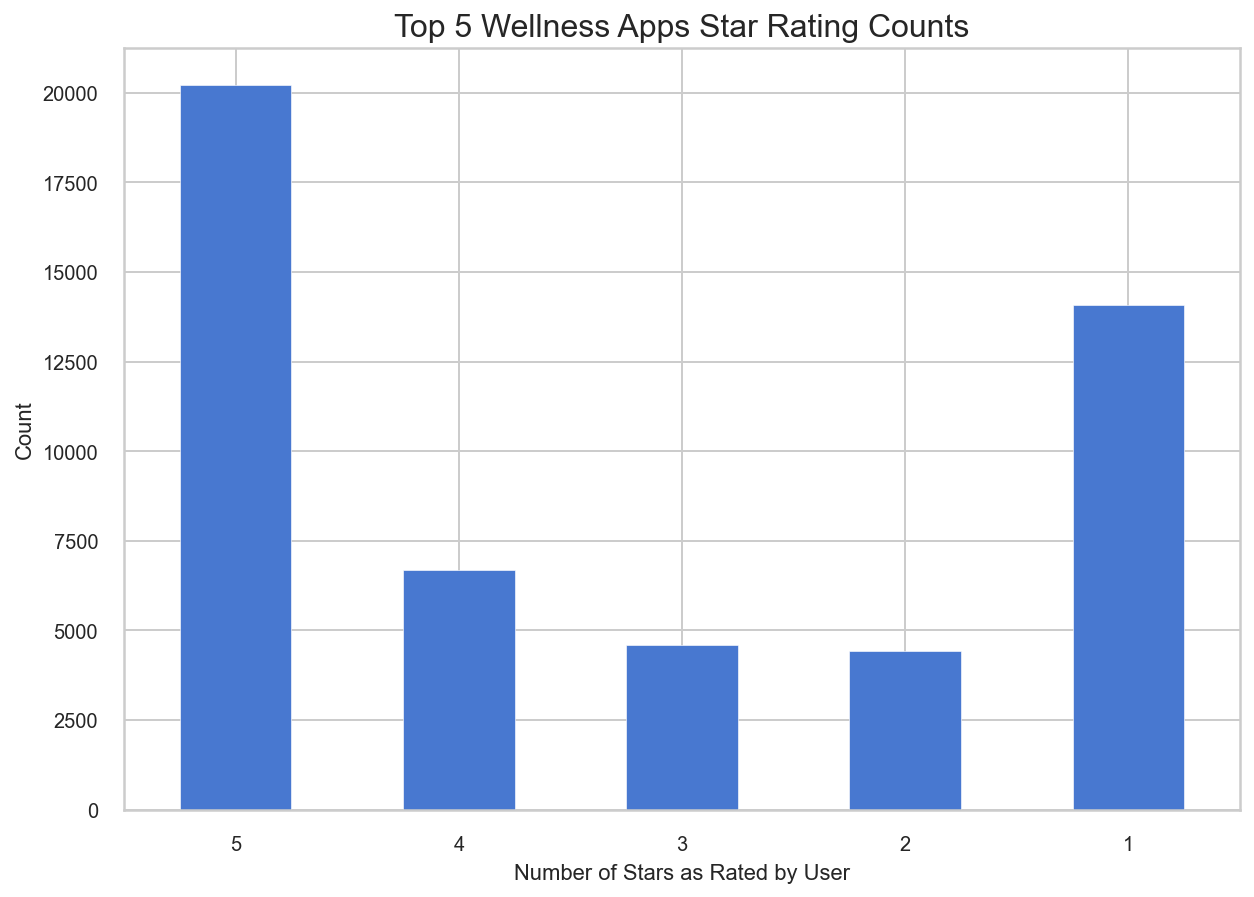

<Figure size 432x288 with 0 Axes>

In [6]:
#counting how many reviews fall into each category
app_reviews_df['score'].value_counts().sort_index(ascending=False).plot(kind='bar', figsize=(10,7))
plt.title('Top 5 Wellness Apps Star Rating Counts', fontsize=16)
plt.xlabel('Number of Stars as Rated by User')
plt.xticks(rotation=0) 
plt.ylabel('Count')
plt.show()
plt.savefig('All_apps_rating_counts')

>**Observation:** Top and bottom ratings are the most frequently occuring accross all 5 apps. This makes sense, since they are the highest and lowest rated scores and informative when people are considering a product. The accompanying content of a review could inform best practice as well as greatest opportunity to improve and is the intentional objective of this work.

In [7]:
app_reviews_df['application'].value_counts()

com.myfitnesspal.android        10000
com.calm.android                10000
com.gen.workoutme               10000
com.getsomeheadspace.android    10000
com.fitbit.FitbitMobile         10000
Name: application, dtype: int64

### 👀 Comparing Apps in Terms of Ratings:

In [8]:
#creating a dataframe for each app for potential future use
calm_df = app_reviews_df[app_reviews_df['application'] == 'com.calm.android']
fitpal_df = app_reviews_df[app_reviews_df['application'] == 'com.myfitnesspal.android']
me_df = app_reviews_df[app_reviews_df['application'] == 'com.gen.workoutme']
headspace_df = app_reviews_df[app_reviews_df['application'] == 'com.getsomeheadspace.android']
fitbit_df = app_reviews_df[app_reviews_df['application'] == 'com.fitbit.FitbitMobile']

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
# fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(12,9))

# for app in app_reviews_df['application'].unique():
#     app.value_counts().plot(kind='bar', title=app)

In [11]:
app_dict = {'Calm': calm_df, 'MyFitnessPal' : fitpal_df, 'WorkoutMe' : me_df,
          'Headspace' : headspace_df,'FitBit' : fitbit_df}

In [12]:
calm_df

userName                                            content  \
0     Brogan Houston  I don't care about all the sleep stories, I ju...   
1       Aubrey Karim  This app is great for sleep and for meditation...   
2          Glenneroo  Can't even try the app without creating a logi...   
3          Nathan T.  Not sure why the low reviews. But this is a re...   
4            Kylie O  this app is really great other than the fact t...   
...              ...                                                ...   
9995   A Google user  This is an amazing app for meditation and mind...   
9996   21DNOEFC FANS  free trial didnt even start i have £35.99 pend...   
9997   A Google user  I love the stories the narrator tells. The mus...   
9998   Dana Venziano  this is amazingly calming! I've had trouble fa...   
9999     Dana Malone  For the first time I am regularly meditating! ...   

      score  thumbsUpCount reviewCreatedVersion                   at  \
0         1            837                 4.29  2020-07-11 09:06:57   
1         4            344                 4.29  2020-07-07 16:40:53   
2         1            698                 4.29  2020-07-07 19:32:31   
3         5            305                 4.29  2020-07-07 21:05:20   
4         3            524                 4.29  2020-07-15 05:49:42   
...     ...            ...                  ...                  ...   
9995      5              0                4.3.1  2018-12-16 13:21:29   
9996      1             23                4.7.1  2019-04-18 19:13:51   
9997      5              0                4.6.3  2019-03-31 20:17:03   
9998      5              0                  4.4  2019-03-29 05:51:40   
9999      5              0                4.6.1  2019-03-17 19:01:01   

                                           replyContent            repliedAt  \
0                                                   NaN                    _   
1                                                   NaN                    _   
2                                                   NaN                    _   
3                                                   NaN                    _   
4                                                   NaN                    _   
...                                                 ...                  ...   
9995                                                NaN                    _   
9996  Hi Helen, We've found Google Play will put a h...  2019-04-24 13:02:46   
9997                                                NaN                    _   
9998                                                NaN                    _   
9999                                                NaN                    _   

           application  replied  
0     com.calm.android    False  
1     com.calm.android    False  
2     com.calm.android    False  
3     com.calm.android    False  
4     com.calm.android    False  
...                ...      ...  
9995  com.calm.android    False  
9996  com.calm.android     True  
9997  com.calm.android    False  
9998  com.calm.android    False  
9999  com.calm.android    False  

[10000 rows x 10 columns]

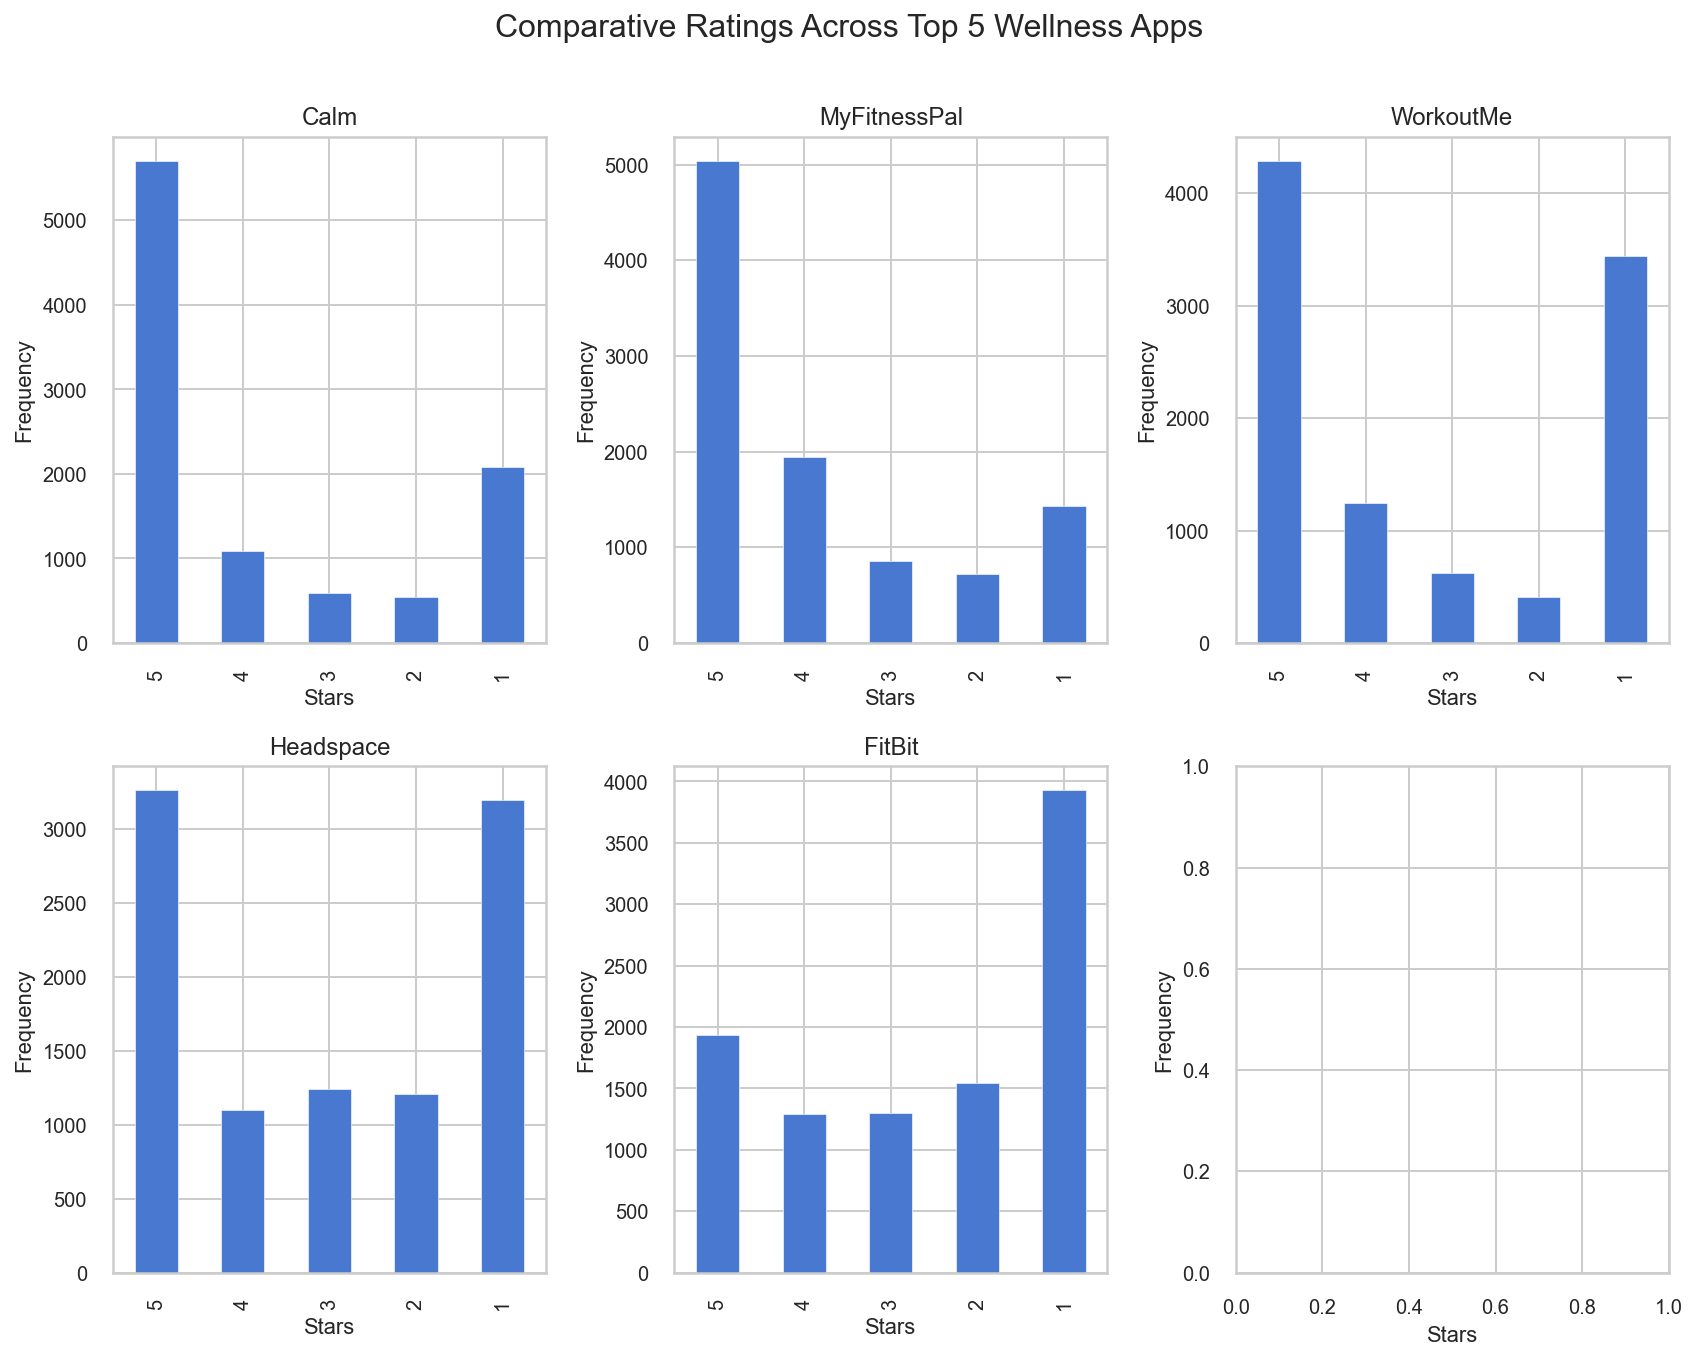

In [13]:
#plotting rating counts between apps
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12,9))
axs = axs.flatten()

i=0

for app, app_df in app_dict.items():
    ax = axs[i]
        #sns.distplot(app_df['score'], ax=a)
    app_df['score'].value_counts().sort_index(ascending=False).plot(kind='bar', ax=ax, title=app)
    i+=1
     
    fig.suptitle('Comparative Ratings Across Top 5 Wellness Apps', y=1.05, fontsize=16)

    for ax in axs.flatten():
        ax.set_xlabel('Stars')
        ax.set_ylabel('Frequency')
        plt.tight_layout(pad=1.5)
    
plt.show()

>**Observation:**  5s and 1's carry over into the individual apps as the most frequent in most cases. One exception is MyFitnessPal.  This pattern makes sense since these reviews were filtered by relevance.  The highest and lowest rating is what informs consumers.  
> Interesting comparing mediation apps:  
    * Calm has more than 2.5 times 5 star ratings and Headspace has almost equal 1 and 5 star ratings.  
> In the space of fitness tracking apps:
    * Fitbit has a majority count of 1 star ratings AND is among top grossing apps? 


In [14]:
app_reviews_df.head()

userName                                            content  score  \
0  Brogan Houston  I don't care about all the sleep stories, I ju...      1   
1    Aubrey Karim  This app is great for sleep and for meditation...      4   
2       Glenneroo  Can't even try the app without creating a logi...      1   
3       Nathan T.  Not sure why the low reviews. But this is a re...      5   
4         Kylie O  this app is really great other than the fact t...      3   

   thumbsUpCount reviewCreatedVersion                   at replyContent  \
0            837                 4.29  2020-07-11 09:06:57          NaN   
1            344                 4.29  2020-07-07 16:40:53          NaN   
2            698                 4.29  2020-07-07 19:32:31          NaN   
3            305                 4.29  2020-07-07 21:05:20          NaN   
4            524                 4.29  2020-07-15 05:49:42          NaN   

  repliedAt       application  replied  
0         _  com.calm.android    False  
1         _  com.calm.android    False  
2         _  com.calm.android    False  
3         _  com.calm.android    False  
4         _  com.calm.android    False

### Squeaky wheels get the grease? Looking into how often a repeat reviewer gets replied to. 

(using df and df1)

In [15]:
#creating a copy of file for eda
df = app_reviews_df.copy()

In [16]:
#Hypothesising replyContent is in response to reviews - probably bad ones - 
#df1: isolating only those with replyContent:
df1 = df[df['replyContent']!='n/a']

In [17]:
df1['score'].value_counts(normalize=True)

5    0.40450
1    0.28150
4    0.13354
3    0.09196
2    0.08850
Name: score, dtype: float64

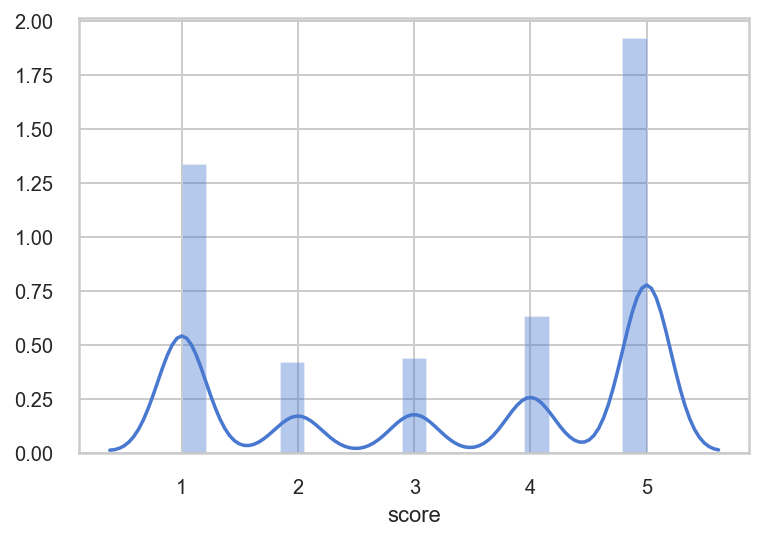

In [18]:
#creating a visualization to 'see' distribution of replies in relation to scores.
reply_content_counts = df1['score']
sns.distplot(reply_content_counts)

**Majority (~ 47%) scores for replyContent response are 5 star reviews...  rejects hypothesis that this field is in response to poor reviews see examples below, but also gives insight that responses also occur for most positive comments as well (24%)**

### 👀  Which app replies more? WorkoutMe...  5 Stars, 1 Stars, 4 Stars

Rating: 1 stars


com.fitbit.FitbitMobile         3927
com.gen.workoutme               3438
com.getsomeheadspace.android    3196
com.calm.android                2077
com.myfitnesspal.android        1437
Name: application, dtype: int64


--------
Rating: 4 stars


com.myfitnesspal.android        1946
com.fitbit.FitbitMobile         1295
com.gen.workoutme               1246
com.getsomeheadspace.android    1101
com.calm.android                1089
Name: application, dtype: int64


--------
Rating: 5 stars


com.calm.android                5704
com.myfitnesspal.android        5040
com.gen.workoutme               4287
com.getsomeheadspace.android    3258
com.fitbit.FitbitMobile         1936
Name: application, dtype: int64


--------
Rating: 3 stars


com.fitbit.FitbitMobile         1302
com.getsomeheadspace.android    1238
com.myfitnesspal.android         853
com.gen.workoutme                619
com.calm.android                 586
Name: application, dtype: int64


--------
Rating: 2 stars


com.fitbit.FitbitMobile         1540
com.getsomeheadspace.android    1207
com.myfitnesspal.android         724
com.calm.android                 544
com.gen.workoutme                410
Name: application, dtype: int64


--------


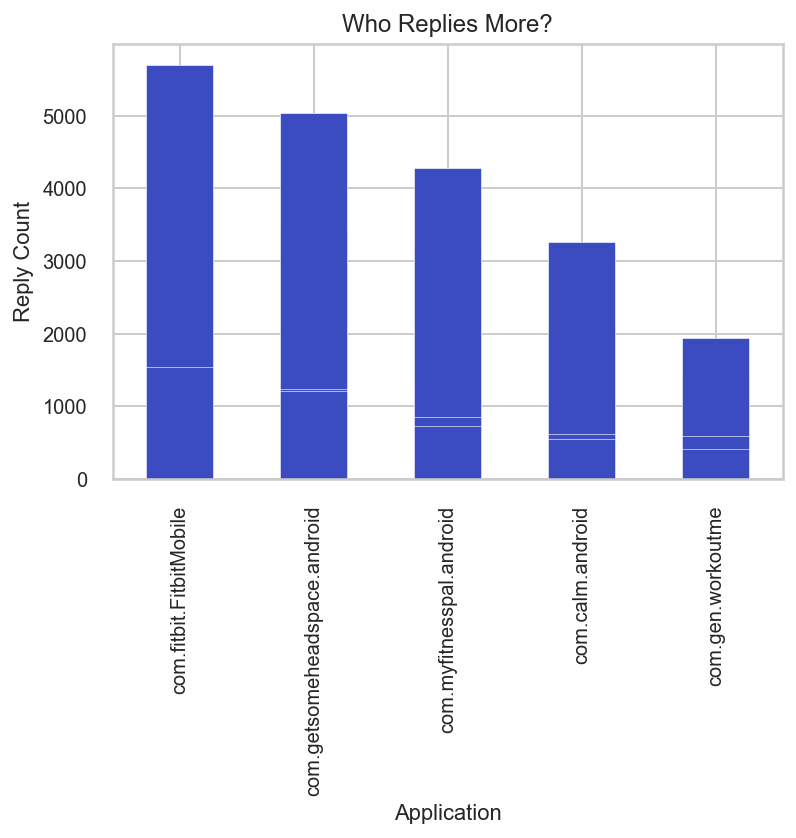

In [19]:
for group in list(df1['score'].unique()):
    reply_count = df1.groupby('score').get_group(group)['application'].value_counts()
    print(f'Rating: {group} stars')
    display(reply_count)
    print()
    print('--------')
    #cmap = [(5,'blue'), 4:'turquoise', 3:'lightblue', 2:'lightgreen',1:'green' }
    reply_count.plot(kind='bar', colormap='coolwarm', title=('Who Replies More?'))
    plt.xlabel('Application')
    plt.ylabel('Reply Count')


### A look at 'repeat reviewers':

In [20]:
repeat_comments = app_reviews_df[app_reviews_df.duplicated(['userName','application'], keep=False)].sort_values('userName')
print(f'The set of repeat reviewers is {len(repeat_comments)} rows.')
av_score = round(repeat_comments['score'].mean(),1)
print(f'The average score of repeat reviers is {av_score}')
repeat_comments


The set of repeat reviewers is 1730 rows.
The average score of repeat reviers is 3.4


userName                                            content  score  \
19760      A A  Used to be a great app, now it doesn't even lo...      1   
19894      A A  I can't install it (((. Tried few times. When ...      1   
49905      A B  I wish the app would sync faster when I wanna ...      4   
46304      A B          Awesome app... easy to maneuver around...      5   
41534      A B  This is ridiculous 😒 I literally have not been...      1   
...        ...                                                ...    ...   
23321      h k  Hey guys, first of all, I adore this app like ...      5   
29853        m  It won't even let me sign up for the app. Ever...      1   
24307        m  Most annoying ads of your app always show up i...      1   
48063      sal  What a load of rubbish. this app use to update...      1   
42316      sal  great app, only one thing that needs sorting w...      5   

       thumbsUpCount reviewCreatedVersion                   at  \
19760              0               20.7.0  2020-05-15 18:30:25   
19894              0               20.6.0  2020-04-08 06:01:28   
49905              0                 3.18  2020-04-08 06:42:32   
46304              0               3.22.1  2020-07-24 05:43:44   
41534              0                 3.21  2020-05-25 02:02:01   
...              ...                  ...                  ...   
23321              1               3.35.0  2019-10-05 02:33:54   
29853              2               3.44.2  2019-12-01 13:31:07   
24307             11                3.7.0  2018-09-21 16:14:21   
48063              1                 3.18  2020-04-06 00:15:56   
42316              1               3.22.1  2020-06-09 00:33:27   

                                            replyContent            repliedAt  \
19760  Our apologies for any problems you are having....  2020-05-17 12:06:29   
19894  We are truly sorry for any issues you are havi...  2020-04-08 08:28:35   
49905                                                NaN                    _   
46304                                                NaN                    _   
41534  Hi there - Thanks for trying a fix. Sorry to h...  2020-05-27 05:00:42   
...                                                  ...                  ...   
23321                                                NaN                    _   
29853                                                NaN                    _   
24307                                                NaN                    _   
48063                                                NaN                    _   
42316                                                NaN                    _   

                        application  replied  
19760      com.myfitnesspal.android     True  
19894      com.myfitnesspal.android     True  
49905       com.fitbit.FitbitMobile    False  
46304       com.fitbit.FitbitMobile    False  
41534       com.fitbit.FitbitMobile     True  
...                             ...      ...  
23321  com.getsomeheadspace.android    False  
29853  com.getsomeheadspace.android    False  
24307  com.getsomeheadspace.android    False  
48063       com.fitbit.FitbitMobile    False  
42316       com.fitbit.FitbitMobile    False  

[1730 rows x 10 columns]

In [21]:
repeat_comments['userName'].value_counts(normalize=True)

A Google user          0.749711
M                      0.004624
Jessica                0.004046
Sarah                  0.003468
Sam                    0.003468
                         ...   
Elliott P              0.001156
Beth Rhinehart-Kuhl    0.001156
T H                    0.001156
David Lee              0.001156
J G                    0.001156
Name: userName, Length: 193, dtype: float64

>**Observation** 'A Google user' occurs is 75% of cases... what about 'Sal'?

In [22]:
repeat_comments.loc[repeat_comments['userName']=='sal']['content']

48063    What a load of rubbish. this app use to update...
42316    great app, only one thing that needs sorting w...
Name: content, dtype: object

>'Sal' and 'A Google user' demonstrates that usernames can be duplicated and might not be as relevant in identifying unique users.

In [23]:
#creating a way to track if someone was replied to 
repeat_comments['wasrepliedto'] = repeat_comments['replyContent']!='n/a'

In [24]:
#investigating how often someone was replied to in this sample:
round(repeat_comments['wasrepliedto'].value_counts(normalize=True),2)

True    1.0
Name: wasrepliedto, dtype: float64

In [25]:
df1.head()

userName                                            content  score  \
0  Brogan Houston  I don't care about all the sleep stories, I ju...      1   
1    Aubrey Karim  This app is great for sleep and for meditation...      4   
2       Glenneroo  Can't even try the app without creating a logi...      1   
3       Nathan T.  Not sure why the low reviews. But this is a re...      5   
4         Kylie O  this app is really great other than the fact t...      3   

   thumbsUpCount reviewCreatedVersion                   at replyContent  \
0            837                 4.29  2020-07-11 09:06:57          NaN   
1            344                 4.29  2020-07-07 16:40:53          NaN   
2            698                 4.29  2020-07-07 19:32:31          NaN   
3            305                 4.29  2020-07-07 21:05:20          NaN   
4            524                 4.29  2020-07-15 05:49:42          NaN   

  repliedAt       application  replied  
0         _  com.calm.android    False  
1         _  com.calm.android    False  
2         _  com.calm.android    False  
3         _  com.calm.android    False  
4         _  com.calm.android    False

In [26]:
df1.groupby('score').get_group(5)['thumbsUpCount'].mean()

2.7400741656365883

In [27]:
#pd.set_option('display.max_colwidth', -1)

### Versions

In [28]:
#looking for various app versions to perhaps evauluate ratings based on version improvements? 
#256 versions between the 5 apps, including '.' which reflects that none was collected
app_reviews_df['reviewCreatedVersion'].value_counts()

.          4816
3.21       1920
3.25       1903
20.7.0     1480
20.11.1    1348
           ... 
3.7           1
3.1.5         1
3.18.6        1
2.8.1         1
2.2.1         1
Name: reviewCreatedVersion, Length: 256, dtype: int64

Comparing highest rated and lowest rated fitness-baesd apps by version count:

In [29]:
#Isolating myfitnesspal app to see how many versions: 15 
app_reviews_df.groupby('application').get_group('com.myfitnesspal.android')['reviewCreatedVersion'].value_counts()

20.7.0     1480
20.11.1    1348
20.10.0    1293
20.9.0     1159
20.2.1      961
20.13.0     928
20.6.1      736
20.12.0     662
20.5.0      427
20.6.0      413
20.3.0      281
20.4.1      155
20.11.0     122
20.8.0       17
20.14.0      14
20.4.0        4
Name: reviewCreatedVersion, dtype: int64

In [30]:
app_reviews_df.groupby('application').get_group('com.fitbit.FitbitMobile')['reviewCreatedVersion'].value_counts()

3.21      1920
3.25      1903
3.23      1163
3.24      1110
3.22.1     777
3.18       539
3.20       484
3.14       449
3.16       400
3.17       305
3.19.2     265
3.19.1     252
3.15       251
3.26.1      80
3.26        53
3.22        47
3.19         2
Name: reviewCreatedVersion, dtype: int64

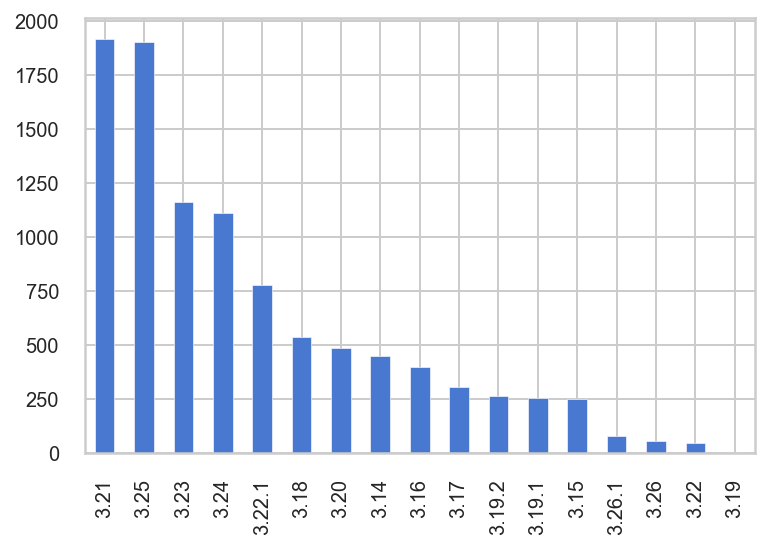

In [31]:
#Isolating fitbit app to see how many versions: 17 
app_version_fitbit = app_reviews_df.groupby('application').get_group('com.fitbit.FitbitMobile')['reviewCreatedVersion'].value_counts()
app_version_fitbit.plot(kind='bar')

In [32]:
app_version_fitbit.head()

3.21      1920
3.25      1903
3.23      1163
3.24      1110
3.22.1     777
Name: reviewCreatedVersion, dtype: int64

In [33]:
fitbit_df[fitbit_df['reviewCreatedVersion']=='3.21']['score'].value_counts(normalize=True)

1    0.330208
5    0.238021
2    0.151562
4    0.140625
3    0.139583
Name: score, dtype: float64

People didn't like version 3.21 of fitbit, it appears that versions 3.23 and 3.24 seem to be better

In [34]:
#!pip install interact


In [35]:
# Clean this up to look at versions...
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### 👀 Version Comparison 

In [36]:
@interact(x=list(app_reviews_df['application'].unique()))
def plt_compare(x):
    fig = plt.figure(figsize=(12,10))
    count = len(app_reviews_df.groupby('application').get_group(x)['reviewCreatedVersion'].unique())
    app_reviews_df.groupby('application').get_group(x)['reviewCreatedVersion'].hist(bins='auto')
    plt.xlabel('Version')
    plt.ylabel('Number of Reviews')
    plt.xticks(rotation=45, fontsize=6) 
    print(f'Version Count : {count}')

interactive(children=(Dropdown(description='x', options=('com.calm.android', 'com.myfitnesspal.android', 'com.…

In [37]:
calm_df[calm_df['reviewCreatedVersion']=='4.20']['score'].value_counts(normalize=True)

5    0.765766
4    0.126126
1    0.069820
3    0.031532
2    0.006757
Name: score, dtype: float64

>**Observation:** Some versions with high review counts get better reviews and some get worse, but versions with high levels of 1's could inform improvements

In [38]:
df = app_reviews_df.copy()

In [39]:
for app in list(df['application'].unique()):
    dfapp = df[df['application'] == app]
    low_score = dfapp[dfapp['score']==1]['reviewCreatedVersion'].value_counts().head(1)
    high_score = dfapp[dfapp['score']==5]['reviewCreatedVersion'].value_counts().head(1)


    print(f"{app}'s lowest rated version had {low_score[0]} reviews for version {low_score.index[0]}, and {high_score[0]} reviews for the highest rated version: {high_score.index[0]}")
print()
print("* A version of '.' indicates none was entered on the review")

com.calm.android's lowest rated version had 775 reviews for version ., and 543 reviews for the highest rated version: 4.19
com.myfitnesspal.android's lowest rated version had 377 reviews for version 20.7.0, and 723 reviews for the highest rated version: 20.10.0
com.getsomeheadspace.android's lowest rated version had 919 reviews for version ., and 434 reviews for the highest rated version: 3.57.0
com.gen.workoutme's lowest rated version had 1289 reviews for version ., and 358 reviews for the highest rated version: 3.8.2
com.fitbit.FitbitMobile's lowest rated version had 735 reviews for version 3.25, and 457 reviews for the highest rated version: 3.21

* A version of '.' indicates none was entered on the review


In [40]:
#used this to explore ways to slice out indices:
low_score = dfapp[dfapp['score']==1]['reviewCreatedVersion'].value_counts().head(1)
print(low_score.index[0], low_score[0])
low_score[0]

3.25 735


735

>**Observation** in three of the 5 cases, (calm, headspace, workoutme) lowest rated versions weren't tracked, in all cases of highest rated versions were tracked. 
>Lowest rating counts were higher in terms of frequency in all cases with the exception of headspace.  At any rate, the dataset is incomplete to provide a lot of detail around versions. 

# Preprocessing:  

In [41]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_list = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aosika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
#creating a df to 'clean' the content 
clean_df = df.copy()

In [43]:
import functions as fn
from importlib import reload
from wordcloud import WordCloud

In [44]:
#generating a text string to use in the function below
text = str(list(clean_df['content']))

#Applying a pre-processing function that cleans text of stopwords, 
#punctuation and capitalization, tokenizes, lemmatizes then finds 
#the most frequently used 100 words
freq_clean = fn.clean_freq(text)
#removed the word app, as it is obvious and was most frequent by 6X the next most freqent word (36901 cases)
#removing the word

## ...and the most common words used in a review are: 

In [45]:
freq_clean

[('free', 7581),
 ('time', 7417),
 ('use', 7416),
 ('love', 6890),
 ('day', 6825),
 ('get', 6739),
 ('like', 6534),
 ('really', 6305),
 ('great', 6179),
 ('sleep', 6153),
 ('meditation', 5952),
 ('fitbit', 5908),
 ('help', 5585),
 ('good', 5462),
 ('would', 5437),
 ('work', 5231),
 ('even', 4706),
 ('one', 4048),
 ('subscription', 4042),
 ('keep', 4024),
 ('pay', 4013),
 ('food', 3835),
 ('sync', 3824),
 ('year', 3790),
 ('update', 3603),
 ('phone', 3458),
 ('much', 3453),
 ('track', 3450),
 ('calm', 3411),
 ('ca', 3389),
 ('need', 3262),
 ('also', 3196),
 ('want', 3161),
 ('using', 3155),
 ('calorie', 3139),
 ('money', 3071),
 ('issue', 3048),
 ('thing', 2993),
 ('make', 2989),
 ('every', 2971),
 ('easy', 2886),
 ('trial', 2860),
 ('used', 2823),
 ('way', 2789),
 ('try', 2757),
 ('still', 2718),
 ('tried', 2683),
 ('could', 2638),
 ('premium', 2515),
 ('find', 2498),
 ('month', 2468),
 ('exercise', 2436),
 ('back', 2420),
 ('well', 2398),
 ('watch', 2388),
 ('option', 2377),
 ('everyt

In [46]:
#cleaning up tokens
clean_toks = fn.clean_tokens(text)

### 👀 Wordcloud: all apps, all reviews

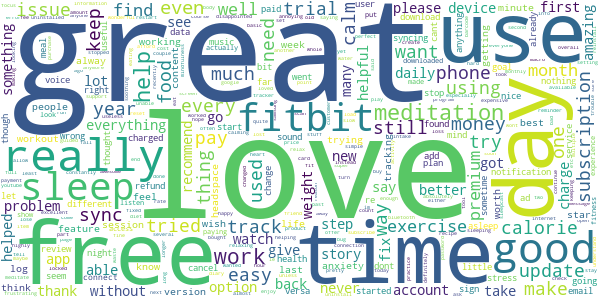

In [47]:

wordcloud = WordCloud(width=600, height=300,background_color="white", max_words=5000, 
                      contour_width=3, collocations=False, contour_color='red')

wordcloud.generate(','.join(clean_toks))

wordcloud.to_image()


>This could be informative for highest and lowest rating

In [48]:
#cleaning the text to remove punctuation and word fragments as well as the word 'app' which occurs 6X more
#than any other word and adds no value
clean_df['content'] = clean_df['content'].apply(fn.clean_tokens)

clean_df['content']

0        [care, sleep, story, use, white, noise, freque...
1        [great, sleep, meditation, however, wish, opti...
2        [even, try, without, creating, login, inside, ...
3        [sure, low, review, really, good, around, enti...
4        [really, great, fact, much, content, paid, yea...
                               ...                        
49995    [fitbit, year, half, yesterday, time, wrong, h...
49996    [raising, rating, 3, star, 2, lot, trouble, co...
49997    [great, android, version, let, add, friend, er...
49998    [notification, service, working, poco, x2, eve...
49999    [great, easy, use, provides, information, need...
Name: content, Length: 50000, dtype: object

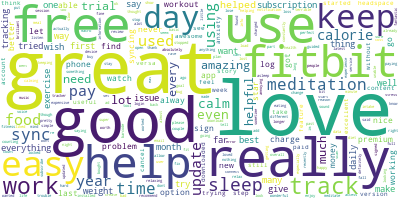

In [49]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, collocations=False, contour_color='steelblue')

wordcloud.generate(clean_df['content'].to_string())

wordcloud.to_image()

>**Observation**: Words like great, really, good, and love are obvious and not informative as to WHAT is great. 'will most likely remove these words to get to the heart of what people are talking about. Removing these words to 'clean up' content for modeling.

In [50]:
import timestamp
import plotly.express as px
from sklearn.cluster import KMeans

# Modeling:

Using the 'clean_df' content to model since it's been lemmatized, and stopwords have been removed, including 'app' which was used 6X more than any other word.

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
clean_df.head()

userName                                            content  score  \
0  Brogan Houston  [care, sleep, story, use, white, noise, freque...      1   
1    Aubrey Karim  [great, sleep, meditation, however, wish, opti...      4   
2       Glenneroo  [even, try, without, creating, login, inside, ...      1   
3       Nathan T.  [sure, low, review, really, good, around, enti...      5   
4         Kylie O  [really, great, fact, much, content, paid, yea...      3   

   thumbsUpCount reviewCreatedVersion                   at replyContent  \
0            837                 4.29  2020-07-11 09:06:57          NaN   
1            344                 4.29  2020-07-07 16:40:53          NaN   
2            698                 4.29  2020-07-07 19:32:31          NaN   
3            305                 4.29  2020-07-07 21:05:20          NaN   
4            524                 4.29  2020-07-15 05:49:42          NaN   

  repliedAt       application  replied  
0         _  com.calm.android    False  
1         _  com.calm.android    False  
2         _  com.calm.android    False  
3         _  com.calm.android    False  
4         _  com.calm.android    False

## Classes: 'good', 'neutral' & 'bad' 

>Since the best in class '5 Stars' and worst in class '1 Star' reviews is what would be most informative, the data will be categorized as such: 'good' is rated 5 Stars, 'bad' was rated 1 Star, and 'neutral' will be 2-4 stars.

In [53]:
stars_dict = {5:'good', 4:'neutral', 3: 'neutral', 2:'neutral', 1:'bad'}
clean_df['Target'] = clean_df['score'].map(stars_dict)

In [54]:
clean_df.to_csv('clean_df.csv')
#!pip install yellowbrick

### Baseline Values: 

In [55]:
clean_df['Target'].value_counts(dropna=True, normalize=True)

good       0.4045
neutral    0.3140
bad        0.2815
Name: Target, dtype: float64

## Main Dataset:

In [56]:
reload(fn)

<module 'functions' from 'C:\\Users\\aosika\\Documents\\GitHub\\Flatiron_Capstone\\functions.py'>

In [57]:
#pulling the strings back together
clean_df['content'] = clean_df['content'].apply(lambda x: ' '.join(x))

In [58]:
clean_df['content'] = clean_df['content'].apply(fn.clean_tokens)

In [59]:
X = clean_df['content'].apply(lambda x: ' '.join(x))
y = clean_df['Target']

In [60]:
X.to_csv('X.csv')

In [61]:
#a quick look at X:
X[0]

'care sleep story use white noise frequently throughout night white noise playing stop apparent reason even timer set 8 hour open resume sound stupid pop-up window come saying great job let close window good second allowing fully wake get white noise going frustrating'

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=2)

In [63]:
type(X_train)

pandas.core.series.Series

In [64]:
# X_train.to_csv('X_train.csv')
# X_test.to_csv('X_test.csv')

In [65]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

## Various Classification Models, Multi NB, LinearSVC, LogReg

https://medium.com/syncedreview/applying-multinomial-naive-bayes-to-nlp-problems-a-practical-explanation-4f5271768ebf

 Laplace smoothing , which is a technique for smoothing categorical data. A small-sample correction, or pseudo-count, will be incorporated in every probability estimate. Consequently, no probability will be zero. this is a way of regularizing Naive Bayes, and when the pseudo-count is zero, it is called Laplace smoothing. While in the general case it is often called Lidstone smoothing.

In [66]:
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB(alpha=6)),
              ])
nb.fit(X_train, y_train)


from sklearn.metrics import classification_report, accuracy_score
y_pred = nb.predict(X_test)

print('Accracy Score: %s' % round(accuracy_score(y_pred, y_test),2))
print(classification_report(y_test, y_pred))


Accracy Score: 0.73
              precision    recall  f1-score   support

         bad       0.74      0.71      0.72      4167
        good       0.77      0.92      0.84      6123
     neutral       0.63      0.50      0.56      4710

    accuracy                           0.73     15000
   macro avg       0.72      0.71      0.71     15000
weighted avg       0.72      0.73      0.72     15000



In [67]:
#to get information from both the scalers and classifiers
nbscaler = nb.named_steps['tfidf']
nbclassifier = nb.named_steps['clf']

theorized that the best model for nlp is Linear Support Vector Machine..
https://scikit-learn.org/stable/modules/svm.html#svm-kernels

In [68]:
from sklearn.svm import LinearSVC

weights = {'good':.4, 'bad':.4, 'neutral':.25}

lSVC = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', LinearSVC(dual=False, multi_class='ovr',C=.7,
                                  random_state=42,class_weight= weights,
                                  max_iter=6)),
               ])
lSVC.fit(X_train, y_train)


y_pred = lSVC.predict(X_test)

print('Accracy Score: %s' % round(accuracy_score(y_pred, y_test),2))
print(classification_report(y_test, y_pred))


Accracy Score: 0.74
              precision    recall  f1-score   support

         bad       0.69      0.85      0.76      4167
        good       0.78      0.92      0.85      6123
     neutral       0.71      0.41      0.52      4710

    accuracy                           0.74     15000
   macro avg       0.73      0.72      0.71     15000
weighted avg       0.74      0.74      0.72     15000



In [69]:
lSVCscaler = lSVC.named_steps['tfidf']
lSVCclassifier = lSVC.named_steps['clf']

In [70]:
# feats = lSVCscaler.get_feature_names()

In [71]:
import pickle
#pickeling this model for another notebook to use for dashboard:
with open("lSVC.pickle", "wb") as f:
    pickle.dump(lSVC, f)

## ➡️ The most meaningful words in a negative and positive review are..

Negative Sentiment Classifier


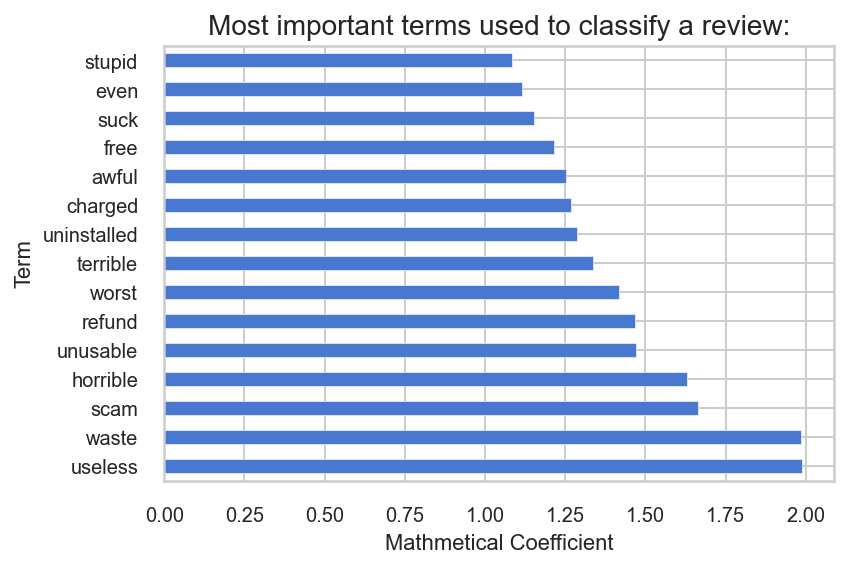

In [72]:
print(f'Negative Sentiment Classifier')
fn.plot_coefs(lSVCclassifier, lSVCscaler, 'bad')

Positive Sentiment Clasifier:


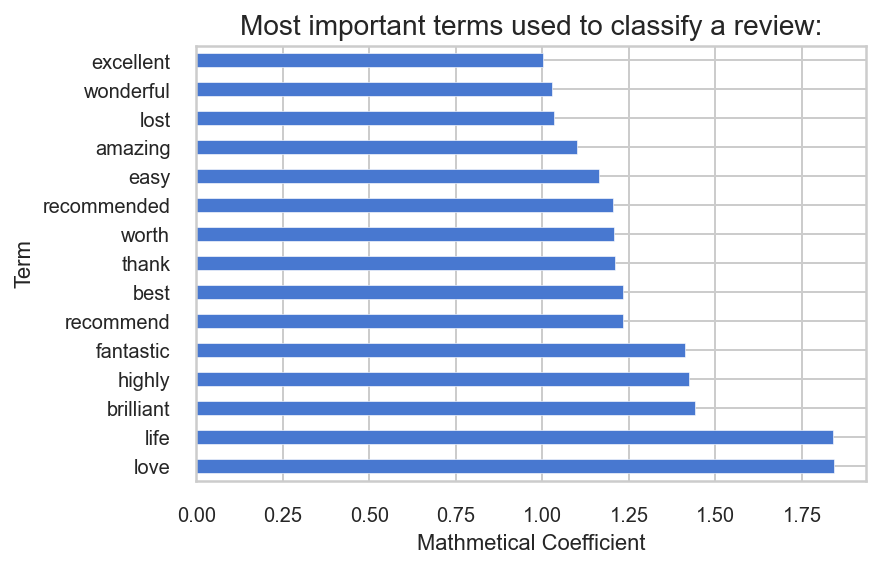

In [73]:
print('Positive Sentiment Clasifier:')
fn.plot_coefs(lSVCclassifier, lSVCscaler, 'good')

from https://medium.com/@aneesha/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d

In [153]:
#functionalizing the classifier:
new_review = ['This app is awesome']

def classify_review(new_review):
    array = lSVC.predict(new_review)
    results = array[0]
    return results

In [154]:
#Testing the function
classify_review(new_review)

'good'

In [74]:
lSVC.get_params()

{'memory': None,
 'steps': [('tfidf',
   TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                   dtype=<class 'numpy.float64'>, encoding='utf-8',
                   input='content', lowercase=True, max_df=1.0, max_features=None,
                   min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                   smooth_idf=True, stop_words=None, strip_accents=None,
                   sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                   tokenizer=None, use_idf=True, vocabulary=None)),
  ('clf',
   LinearSVC(C=0.7, class_weight={'bad': 0.4, 'good': 0.4, 'neutral': 0.25},
             dual=False, fit_intercept=True, intercept_scaling=1,
             loss='squared_hinge', max_iter=6, multi_class='ovr', penalty='l2',
             random_state=42, tol=0.0001, verbose=0))],
 'verbose': False,
 'tfidf': TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                 dtype=<class 'numpy.float64'>, encoding

In [75]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', SGDClassifier(loss='modified_huber', penalty='l2',
                                      alpha=.001, random_state=42, max_iter=6, 
                                      tol=None)),
               ])
sgd.fit(X_train, y_train)


y_pred = sgd.predict(X_test)

print('Accracy Score: %s' % round(accuracy_score(y_pred, y_test),2))
print(classification_report(y_test, y_pred))


Accracy Score: 0.74
              precision    recall  f1-score   support

         bad       0.72      0.79      0.76      4167
        good       0.80      0.90      0.84      6123
     neutral       0.67      0.50      0.57      4710

    accuracy                           0.74     15000
   macro avg       0.73      0.73      0.73     15000
weighted avg       0.74      0.74      0.74     15000



In [76]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5))])
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.7104
              precision    recall  f1-score   support

         bad       0.71      0.73      0.72      4167
        good       0.80      0.84      0.82      6123
     neutral       0.58      0.53      0.56      4710

    accuracy                           0.71     15000
   macro avg       0.70      0.70      0.70     15000
weighted avg       0.71      0.71      0.71     15000



## Modeling Result Summary: Best Model = Linear Support Vector Classification

                                           

> Greatests returns in accuracy and recall in terms of positive and negative ratings which is what we are mostly interested in informing were realized with a Linear Support Vector Classification, making the loss in recall for Neutral Sentiment acceptable>

Model | Accuracy | Positive Recall | Negative Recall | Neutral Recall |
--| --| --| --| --|
NB| 73 | 92 | 71 |50|
**lSVC**|**74** |**92** | **85** | **41** |
SGDC |74 | 90 | 79 | 50 |
LgReg | 71 | 84 |73|55|

In [77]:
reload(fn)

<module 'functions' from 'C:\\Users\\aosika\\Documents\\GitHub\\Flatiron_Capstone\\functions.py'>

In [78]:
#cleaner tokens for better modeling? Dropping words like good, great, love and rubbish, terrible
X_train_cleaner = X_train.apply(fn.cleaner_tokens)

In [79]:
X_train_cleaner

6414     [best, mindfulness, hand, imo, ive, tried, gea...
38857    [workout, perfect, need, give, second, workout...
1176                    [daily, check-in, deeper, session]
24014    [helped, much, fact, pay, continue, session, b...
41981    [bad, update, update, 3.21, nice, new, interfa...
                               ...                        
44566    [distance, 0.1mile, mile, walked, consistently...
30280    [absolute, scam, buy, opened, paying, 30€, fin...
6637     [started, incorporate, different, element, dai...
35343               [cool, got, result, wanted, two, week]
23720    [okay, yes, everything, pay, pay, buy, subscri...
Name: content, Length: 35000, dtype: object

In [80]:
X_train_cleaner = X_train_cleaner.apply(lambda x: " ".join(x))

In [81]:
lSVC.fit(X_train_cleaner, y_train)


y_pred = lSVC.predict(X_test)

print('Accracy Score: %s' % round(accuracy_score(y_pred, y_test),2))
print(classification_report(y_test, y_pred))

Accracy Score: 0.72
              precision    recall  f1-score   support

         bad       0.69      0.80      0.74      4167
        good       0.74      0.94      0.83      6123
     neutral       0.70      0.36      0.47      4710

    accuracy                           0.72     15000
   macro avg       0.71      0.70      0.68     15000
weighted avg       0.71      0.72      0.69     15000



>**Observation**: In terms of accuracy, the 'cleaner' tokens reduced accuracy, while improving 'good' positive sentiment recall, while depreciating 'bad' or negative sentiment recall.

## Clustering on the entire corpus across all reviews didn't provide too much insight, a spearate noteook called corpus clusters walks through KMeans clustering.

# More EDA: Separtating the into two parts: Good, clean clusters and Bad clean clusters to gain more distinct insight.

# Negative Reviews:

### 👀 Low Rated WordCloud:

In [82]:
#creating a negative sentiment dataset:
bad_clean_df = clean_df[clean_df['Target']=='bad']

In [83]:
#importing Image to use with np.array to create mask
from PIL import Image
neg_words = bad_clean_df['content'].to_string()
neg_mask = np.array(Image.open('neg_mask.png'))

---- Words Most Frequently Used In A 1-Star Review----


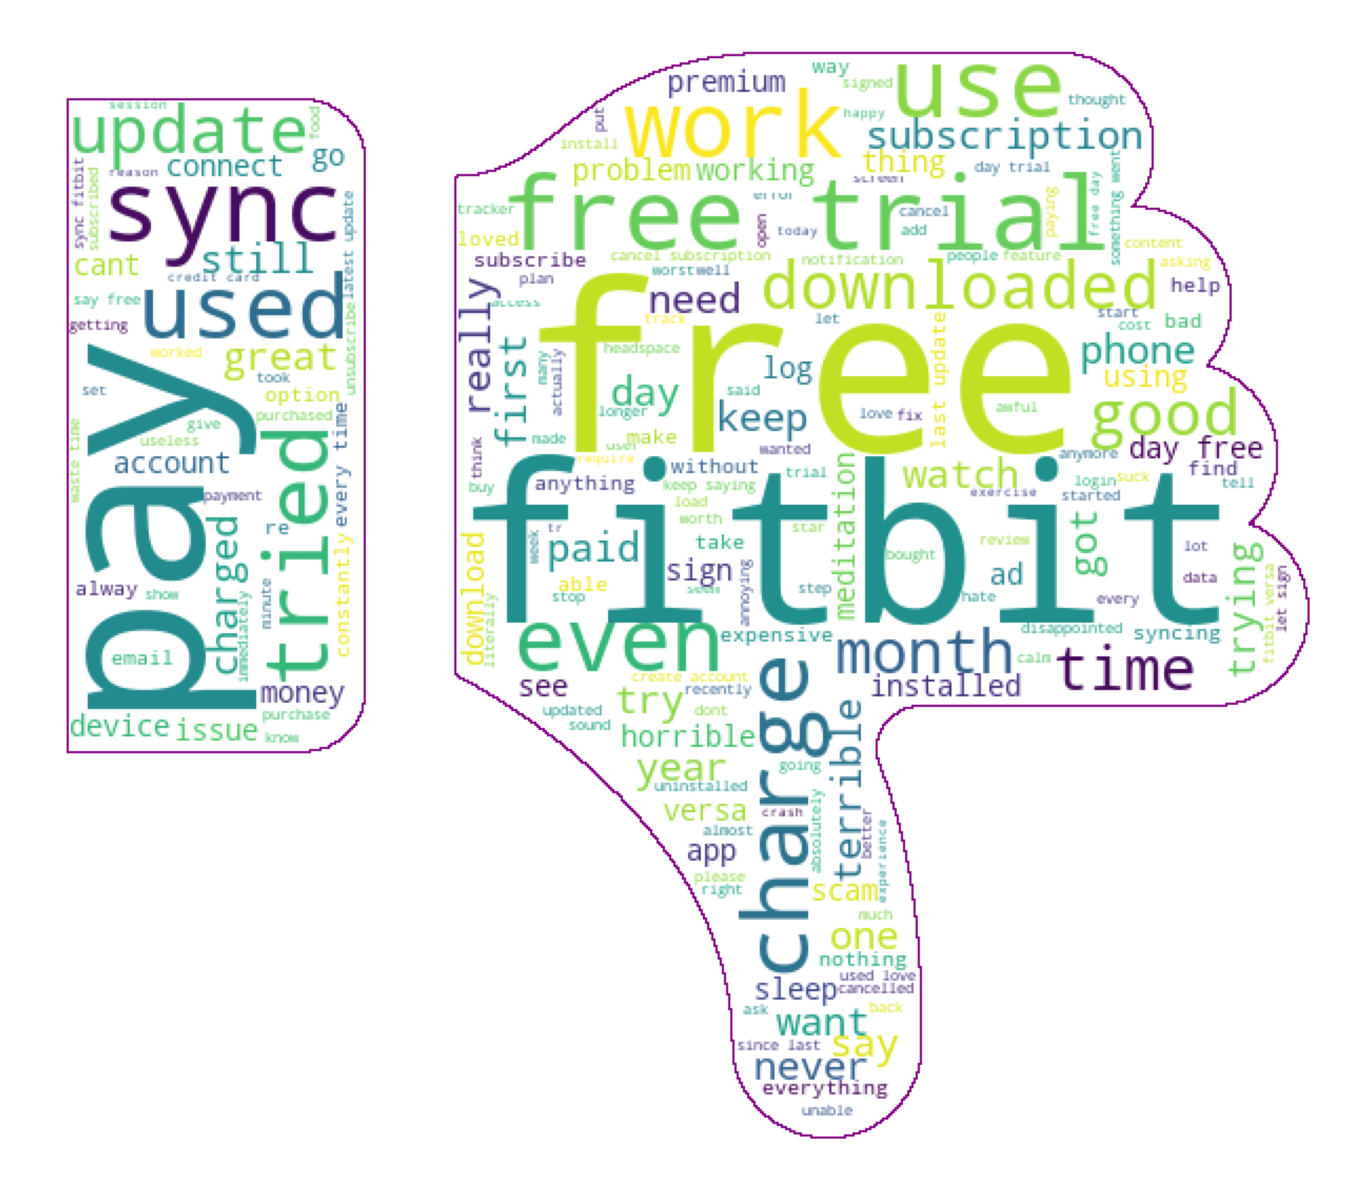

In [84]:
print('---- Words Most Frequently Used In A 1-Star Review----')
fn.generate_wordcloud(neg_words, neg_mask)

In [85]:
#pulling it back together so can further clean less meaningful words:
bad_clean_df['content'] = bad_clean_df['content'].apply(lambda x: ' '.join(x))

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [87]:
#making a copy of the bad_clean_df to do some clustering analysis


In [88]:
bad_clean_df.head()

userName                                            content  score  \
0  Brogan Houston  care sleep story use white noise frequently th...      1   
2       Glenneroo  even try without creating login inside feature...      1   
5     Jack Nimble  could experience sleep feature trial mode supp...      1   
6   Sarah O'Brien  signed yearly service supposed charged end 7 d...      1   
7      crissy ver  actually causing stress subscribed premium ser...      1   

   thumbsUpCount reviewCreatedVersion                   at replyContent  \
0            837                 4.29  2020-07-11 09:06:57          NaN   
2            698                 4.29  2020-07-07 19:32:31          NaN   
5             21                 4.29  2020-07-26 05:06:08          NaN   
6            563                 4.29  2020-07-06 20:35:19          NaN   
7            310                 4.29  2020-07-08 00:27:42          NaN   

  repliedAt       application  replied Target  
0         _  com.calm.android    False    bad  
2         _  com.calm.android    False    bad  
5         _  com.calm.android    False    bad  
6         _  com.calm.android    False    bad  
7         _  com.calm.android    False    bad

## Negative Sentiment Clustering : 

Using an elbow plot to find ideal number of clusters for negative reviews

In [89]:
reload(fn)

<module 'functions' from 'C:\\Users\\aosika\\Documents\\GitHub\\Flatiron_Capstone\\functions.py'>

In [90]:
#cleaning the tokens with the more advanced cleaner - removing words like:
#'rubbish', 'terrible', 'worst', 
bad_clean_df['content'] = bad_clean_df['content'].apply(fn.cleaner_tokens)

In [91]:
negtext = bad_clean_df['content'].to_string()

In [92]:
freq_neg = fn.clean_freq(negtext)

## The most frequently used words in negative reviews are: 

In [93]:
freq_neg

[('free', 1888),
 ('fitbit', 1003),
 ('sync', 981),
 ('pay', 894),
 ('get', 866),
 ('trial', 846),
 ('even', 840),
 ('update', 826),
 ('day', 775),
 ('time', 734),
 ('subscription', 648),
 ('used', 635),
 ('use', 614),
 ('keep', 579),
 ('sign', 564),
 ('work', 563),
 ('tried', 554),
 ('year', 546),
 ('try', 514),
 ('money', 496),
 ('say', 468),
 ('charge', 466),
 ('would', 462),
 ('like', 453),
 ('want', 427),
 ('account', 424),
 ('since', 401),
 ('cancel', 400),
 ('7', 393),
 ('let', 391),
 ('phone', 390),
 ('month', 387),
 ('2', 377),
 ('log', 375),
 ('downloaded', 348),
 ('charged', 346),
 ('every', 346),
 ('everything', 342),
 ('got', 339),
 ('syncing', 329),
 ('versa', 325),
 ('could', 320),
 ('trying', 319),
 ('never', 311),
 ('premium', 308),
 ('3', 308),
 ('last', 307),
 ('one', 304),
 ('issue', 302),
 ('first', 285),
 ('paid', 283),
 ('watch', 282),
 ('make', 278),
 ('need', 276),
 ('working', 274),
 ('sleep', 268),
 ('give', 264),
 ('problem', 261),
 ('device', 253),
 ('witho

https://www.knime.com/blog/topic-extraction-optimizing-the-number-of-topics-with-the-elbow-method
using Kmeans clustering elbow plot to consider how many topics to use for LDA:


In [94]:
np.random.seed(41)
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

neg_content = bad_clean_df['content'].apply(lambda x: ' '.join(x))

neg_tfidf = TfidfVectorizer()

B = neg_tfidf.fit_transform(neg_content)

neg_tf_words = neg_tfidf.get_feature_names()

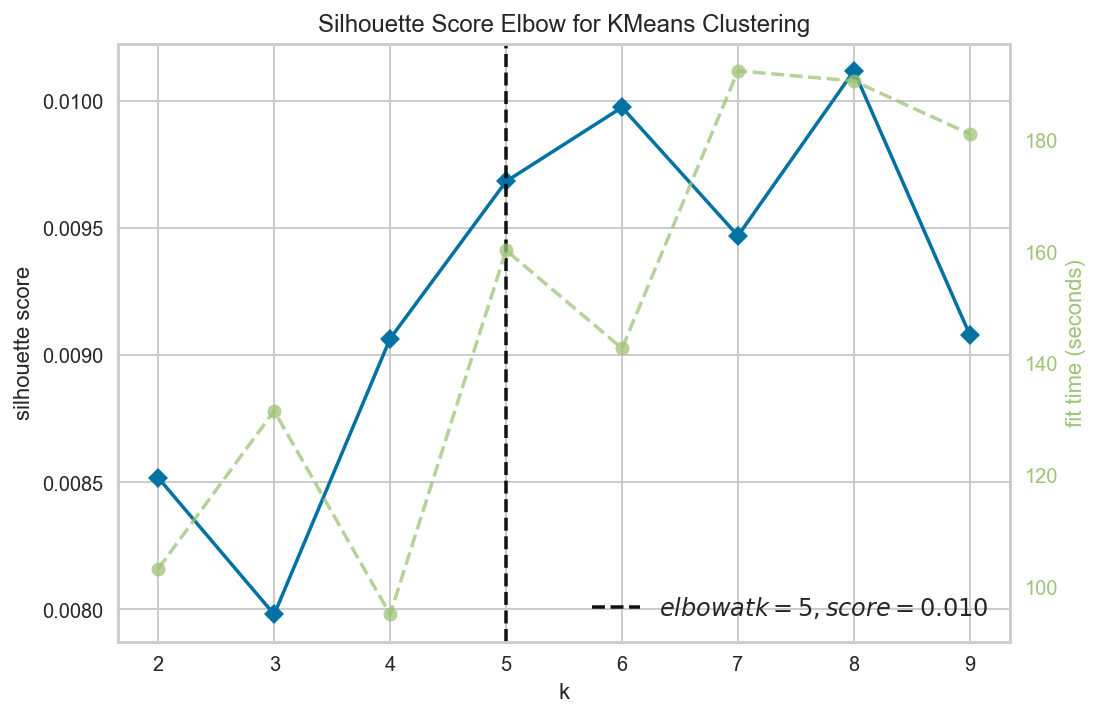

In [95]:
#instanciating a model and using an elbow plot to 
negmodel = KMeans(random_state=2)
visualizer_neg = KElbowVisualizer(negmodel, metric='silhouette', k=(2,10))

visualizer_neg.fit(B)
visualizer_neg.show()

This tells me that I need 5 clusters to start...

In [96]:
with open("kmeans_elbo.png", "wb") as f:
    pickle.dump(visualizer_neg, f)

In [97]:
# with open("visualizer_neg", "rb") as f:
# 	visualizer_neg = visualizer_neg.load(f)

In [98]:
btfidf_vectorizer = TfidfVectorizer()
btfidf = btfidf_vectorizer.fit_transform(neg_content)

In [99]:
bkmeans5 = KMeans(n_clusters=5).fit(btfidf)

In [100]:
bad_clean_df['5cluster'] = bkmeans5.labels_

bad_clean_df

Text(0, 0.5, 'Cluster Number')

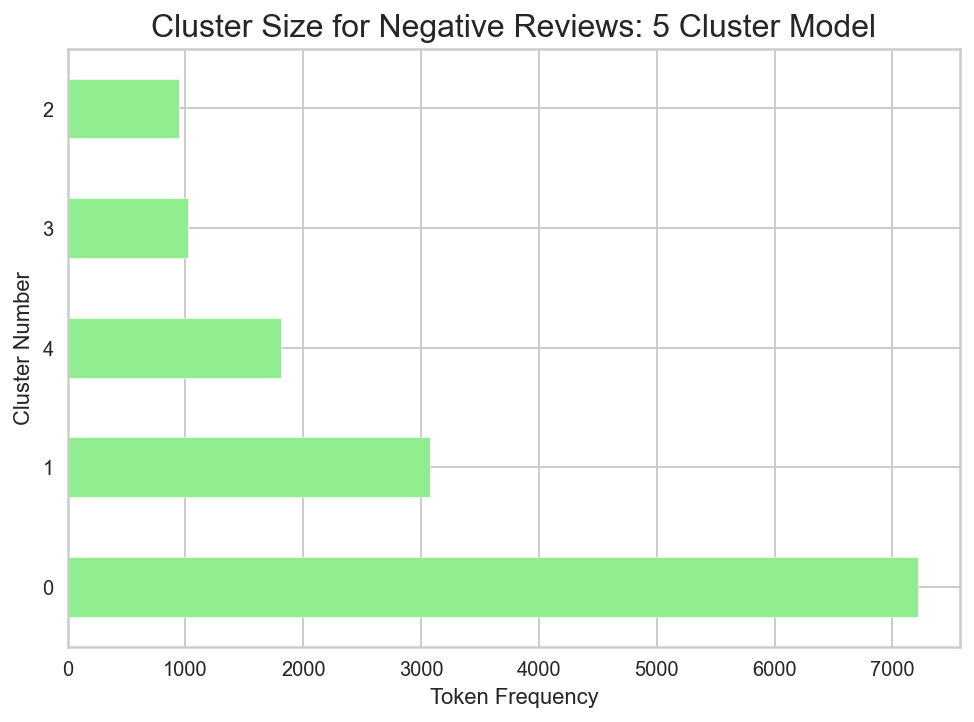

In [101]:
#visualizing clusters
bad_clean_df['5cluster'].value_counts().plot(kind='barh', color='lightgreen')
plt.title('Cluster Size for Negative Reviews: 5 Cluster Model', fontsize=16)
plt.xlabel('Token Frequency')
plt.ylabel('Cluster Number')

>**Observation** there is a clearly dominate cluster. Clusters get consistently smaller. To examine the clusters a WordCloud will be implemented for each to identify patterns or topics. 

In [102]:
bad_1_cluster = bad_clean_df[bad_clean_df['5cluster']==1]
bad_1_cluster['content']

3821     [many, year, got, new, phone, around, july, la...
10249    [recently, taking, forever, load, tried, resta...
10268    [however, needing, find, another, tracking, fi...
10389    [edited, wish, could, give, le, 1, star, count...
10391    [edit, 7/14/20, enough, last, 3, day, 2, day, ...
                               ...                        
49982    [sleep, function, worked, since, bought, new, ...
49986    [work, update, let, log, let, connect, fit, bi...
49990    [fitbit, seriously, lose, customer, permanentl...
49994    [issue, everyone, else, used, two, year, issue...
49995    [fitbit, year, half, yesterday, time, wrong, h...
Name: content, Length: 3078, dtype: object

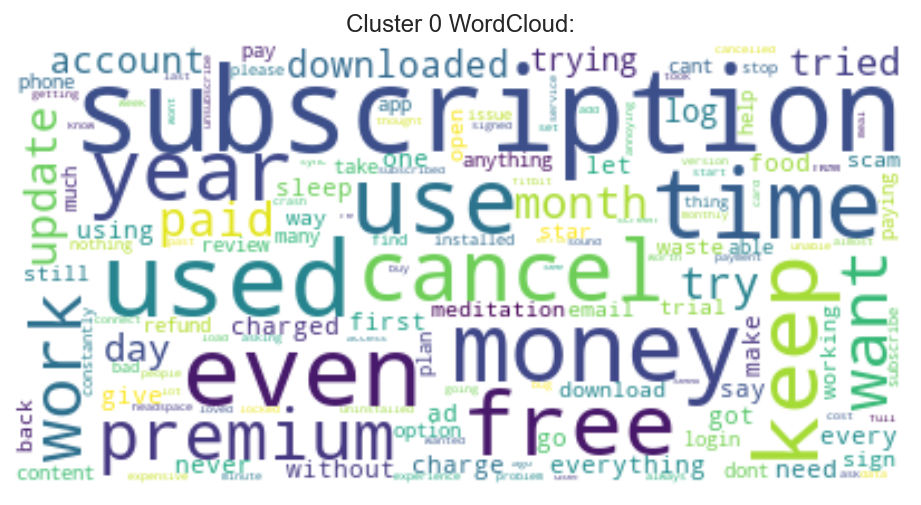

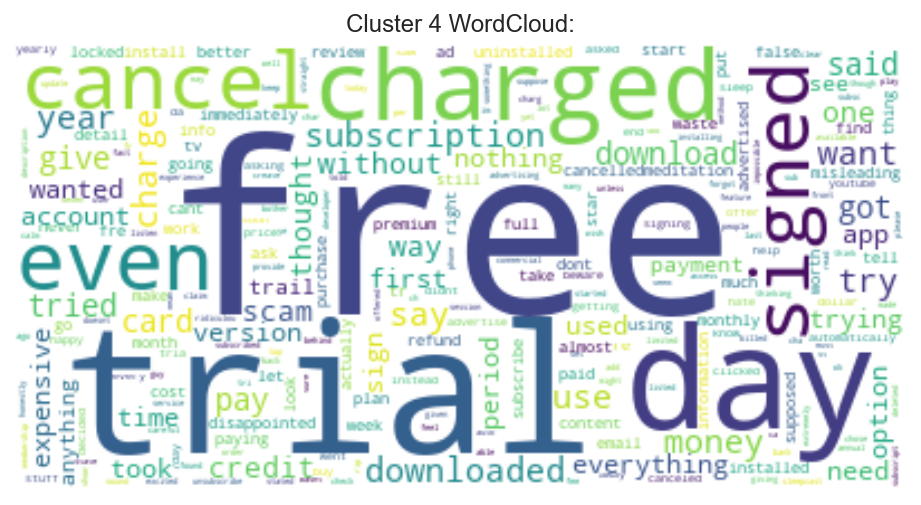

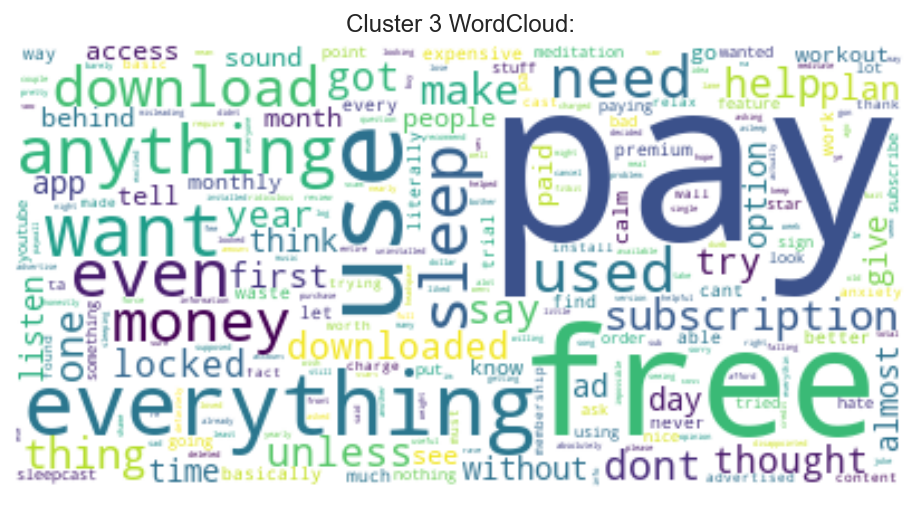

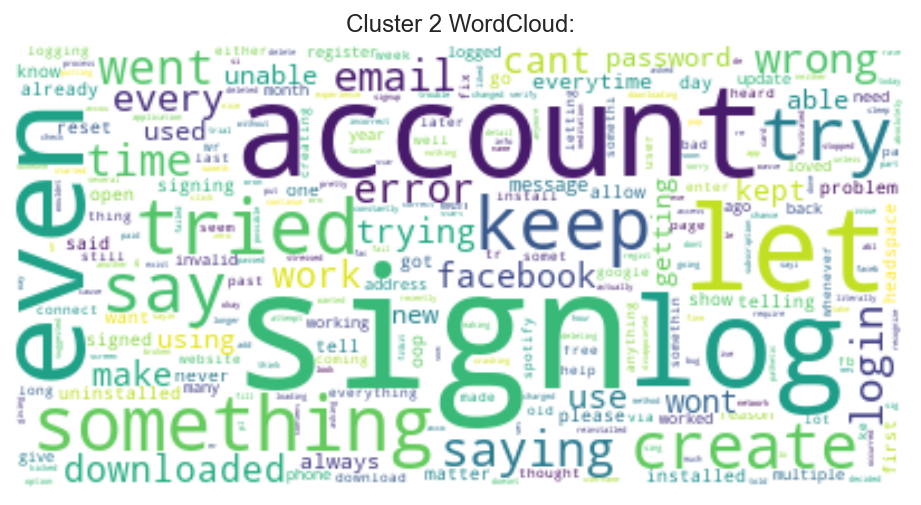

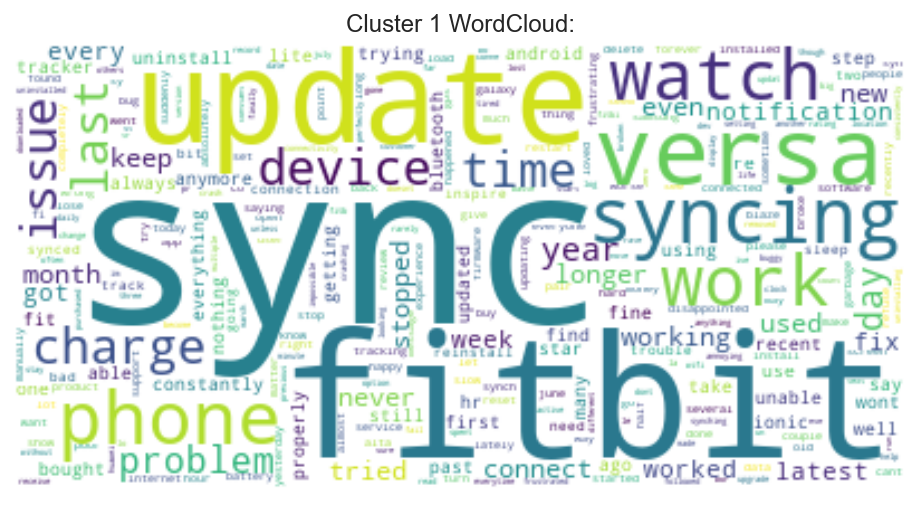

{0: <matplotlib.image.AxesImage at 0x1f2b2ad00f0>,
 4: <matplotlib.image.AxesImage at 0x1f2b2abc710>,
 3: <matplotlib.image.AxesImage at 0x1f2b2b7fe80>,
 2: <matplotlib.image.AxesImage at 0x1f2b35c6e10>,
 1: <matplotlib.image.AxesImage at 0x1f2b34d40b8>}

In [103]:
fn.five_cluster_wrdcld(bad_clean_df)

>**Negative Review WordCloud Observations** : High-level observations using WordCloud, indicate that there are several issues that surface.  Most frequently, terms like 'free', 'charge', 'trial', 'cancel' , and 'subscrition' along with time periods  imply that many comments hold issue with a charge after a free trial period.  The other issues look to be technical.  Terms like 'sync', 'update' 'connect' and 'fitbit' along with other device specific terms.
>Using a word cloud is insightful to discover and explore patterns but lacks a way of quantitatively interpreting clusters. After researching ways to tackle this problem and consulting colleagues, *Latent Dirichlet Allocation or LDA* was introduced.






Using Latent Dirichlet Allocation (LDA) as a redundant source of clustering.  LDA is an unspervised, mixture model learning model where in NLP, terms can belong to more than one cluster

### Preprocesing for negative LDA:

In [104]:
#for LDA.Dictionary we need a list of list of tokens:
list_of_lists = []

for row in bad_clean_df['content']:
    list_of_lists.append(row)
    
list_of_lists

[['care',
  'sleep',
  'story',
  'use',
  'white',
  'noise',
  'frequently',
  'throughout',
  'night',
  'white',
  'noise',
  'playing',
  'stop',
  'apparent',
  'reason',
  'even',
  'timer',
  'set',
  '8',
  'hour',
  'open',
  'resume',
  'sound',
  'pop-up',
  'window',
  'come',
  'saying',
  'job',
  'let',
  'close',
  'window',
  'second',
  'allowing',
  'fully',
  'wake',
  'get',
  'white',
  'noise',
  'going',
  'frustrating'],
 ['even',
  'try',
  'without',
  'creating',
  'login',
  'inside',
  'feature',
  'locked',
  'behind',
  '7',
  'day',
  'trial',
  'version',
  'must',
  'remember',
  'cancel',
  'subscription',
  'otherwise',
  "'re",
  'charged',
  'sleep',
  'help',
  'option',
  'available',
  'free',
  'without',
  'subscription',
  'also',
  'say',
  'need',
  'help',
  'anxiety',
  'initial',
  'dialog',
  'asks',
  'feature',
  'want',
  'yet',
  'half',
  'list',
  'filled',
  'anxiety',
  'related',
  'feature',
  'option',
  'delete',
  'accoun

In [106]:
#code to build and train the negative sentiment model:
# from gensim import corpora, models

# np.random.seed(41)




# #instantiating the Dictionary, pulling out the words that occur less than 3 times and 
# #creating the corpus:
# dictionary_LDA = corpora.Dictionary(list_of_lists)
# dictionary_LDA.filter_extremes(no_below=3)
# corpus = [dictionary_LDA.doc2bow(list_of_tokens) for list_of_tokens in list_of_lists]

# #as indicated by elbowplot:
# num_topics = 5
# #instantiating the model
# %time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
#                                   id2word=dictionary_LDA, \
#                                   passes=10, alpha=[0.1]*num_topics, \
#                                   eta=[0.5]*len(dictionary_LDA.keys()))

Wall time: 1min 19s


In [1]:
#saving the model for time's sake and reproducibility:
#lda_model.save('lda_model.model')
# later on, load trained model from file
lda_model =  models.LdaModel.load('lda_model.model')

NameError: name 'models' is not defined

In [162]:
#to see in each topics what words are associated with them: 
num_topics = 5
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=5):
    print(str(i)+": "+ topic)
    print()

0: 0.022*"log" + 0.017*"time" + 0.016*"even" + 0.016*"keep" + 0.015*"try"

1: 0.014*"use" + 0.014*"sleep" + 0.012*"pay" + 0.012*"money" + 0.011*"get"

2: 0.035*"fitbit" + 0.028*"sync" + 0.022*"update" + 0.018*"phone" + 0.017*"watch"

3: 0.051*"free" + 0.027*"trial" + 0.019*"pay" + 0.019*"day" + 0.017*"subscription"

4: 0.021*"still" + 0.020*"subscription" + 0.020*"cancel" + 0.019*"money" + 0.018*"refund"



In [ ]:
#!pip install pyLDAvis

## 👀 Negative LDA Interactive Visual: 

In [ ]:
# #instaciating and visualizing interactive lda model:
np.random.seed(41)
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
%time vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
%time pyLDAvis.display(vis)

In [ ]:
#saving visualization to html for possible dashboard:
# pyLDAvis.save_html(vis, 'neg_vis.html')

In [127]:
def classify_neg(new_review):
    tokens = fn.clean_tokens(new_review)
    results = lda_model[dictionary_LDA.doc2bow(tokens)]
    return results

In [129]:
new_review = 'this app is horrible it will not sync'
classify_neg(new_review)

[(0, 0.066666946),
 (1, 0.73333204),
 (2, 0.06666713),
 (3, 0.066666946),
 (4, 0.066666946)]

In [ ]:
# import codecs
# file = codecs.open("neg_vis.html", "r", "utf-8")


# Positive Reviews:

In [130]:
#creating a postive sentiment dataset:
good_clean_df = clean_df[clean_df['Target']=='good']

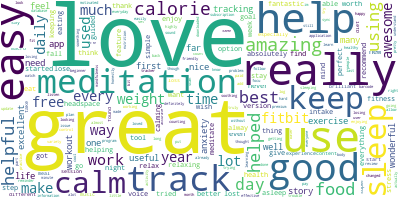

In [131]:
gcwordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, collocations=False, contour_color='steelblue')

gcwordcloud.generate(good_clean_df['content'].to_string())

gcwordcloud.to_image()

In [ ]:
#!pip install Image
#import Image

https://www.datacamp.com/community/tutorials/wordcloud-python

In [ ]:
# pos_mask = np.array(Image.open("img/pos_mask.png"))
# pos_mask

>**Observation**: words like *'love'*, *'great'*, and *'good'* are obvious and not very informative, perhaps dropping a few to render more meaninful/insightful outcomes

In [132]:
#pulling it back together so can further clean less meaningful words:
good_clean_df['content'] = good_clean_df['content'].apply(lambda x: ' '.join(x))

In [133]:
good_clean_df['content'] = good_clean_df['content'].apply(fn.good_clean_tokens)

### 👀 High Rated WordCloud

In [134]:
#importing Image to use with np.array to create mask
from PIL import Image
pos_words = good_clean_df['content'].to_string()
pos_mask = np.array(Image.open('pos_mask.png'))

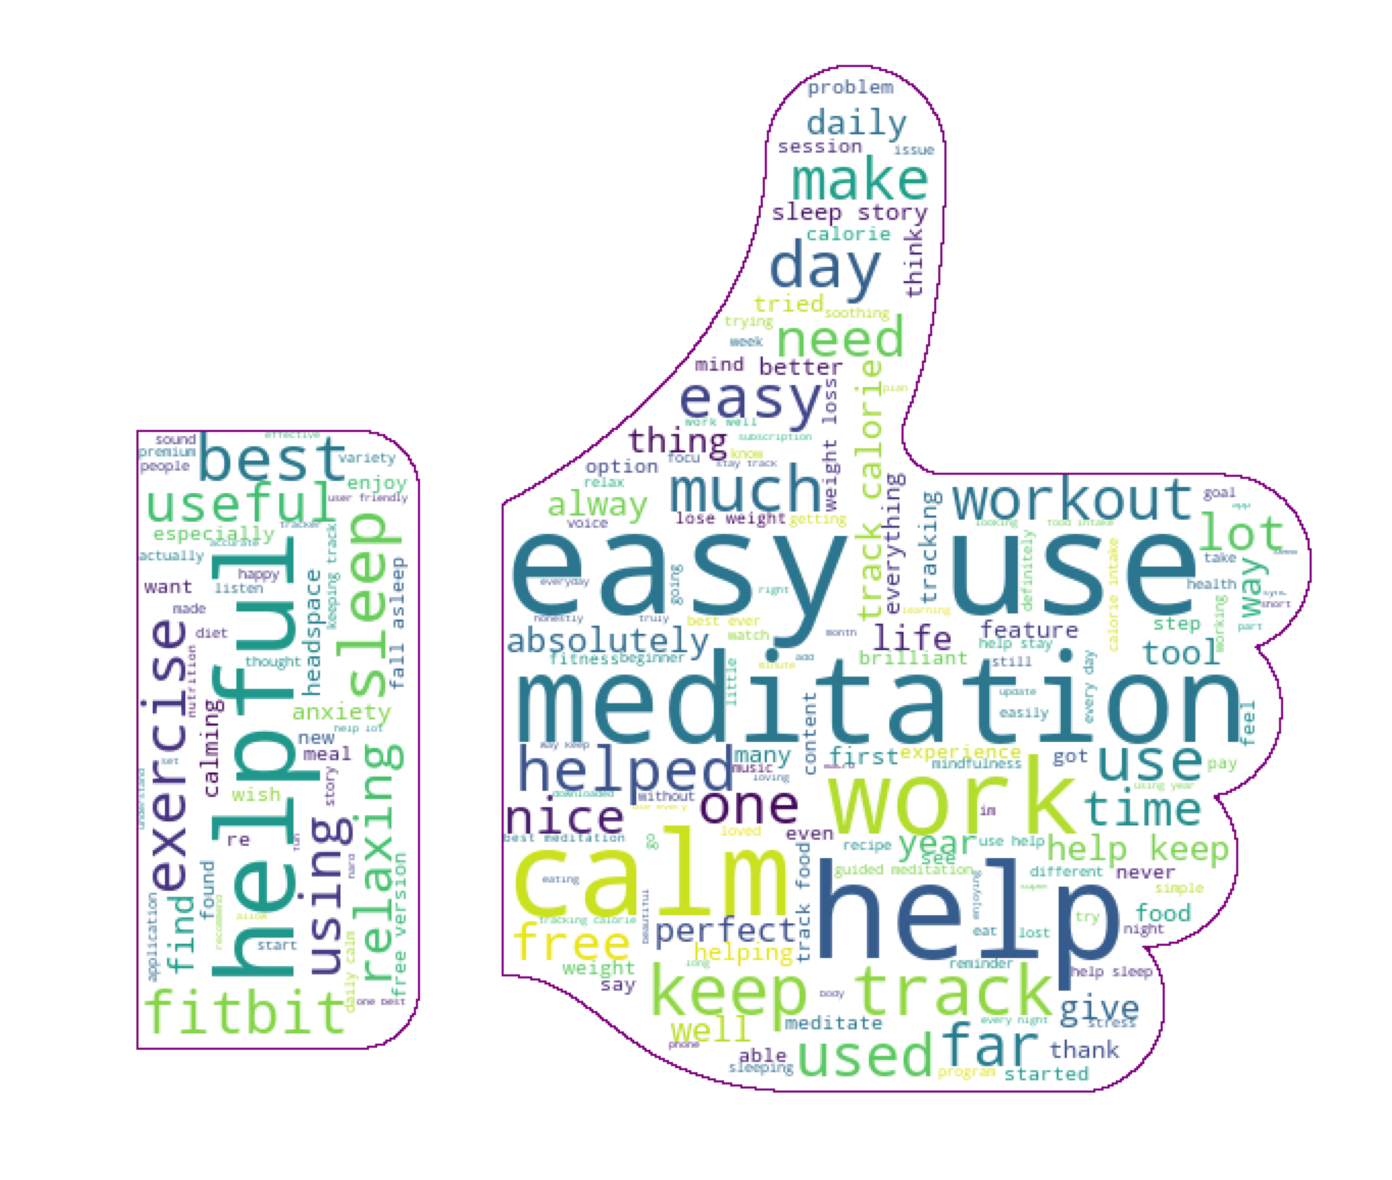

In [135]:
fn.generate_wordcloud(pos_words, pos_mask)

In [136]:
goodcleantext =  str(list(good_clean_df['content']))

In [137]:
#creating a text string and applying a frequency distribution:
goodcleantext =  str(list(good_clean_df['content']))
good_freq_clean = fn.clean_freq(goodcleantext)

## And the top words in a positive review are: 

In [138]:
good_freq_clean

[("'help", 3671),
 ("'meditation", 3525),
 ("'sleep", 3389),
 ("'use", 3277),
 ("'calm", 2694),
 ("'easy", 2667),
 ("'day", 2505),
 ("'track", 2095),
 ("'like", 2019),
 ("'keep", 1970),
 ("'calorie", 1777),
 ("'food", 1753),
 ("'time", 1737),
 ("'much", 1729),
 ("'get", 1654),
 ("'story", 1602),
 ("'work", 1594),
 ("'using", 1476),
 ("'helped", 1474),
 ("'daily", 1439),
 ("'also", 1341),
 ("'recommend", 1317),
 ("'helpful", 1313),
 ("'free", 1299),
 ("'life", 1295),
 ("'one", 1290),
 ("'weight", 1261),
 ("'best", 1257),
 ("'would", 1233),
 ("'make", 1228),
 ("'well", 1195),
 ("'year", 1182),
 ("'every", 1179),
 ("'exercise", 1162),
 ("'way", 1154),
 ("'anxiety", 1094),
 ("'lot", 1033),
 ("'need", 1025),
 ("'feel", 1003),
 ("'better", 1001),
 ("'thank", 990),
 ("'many", 977),
 ("'fitbit", 959),
 ("'even", 896),
 ("'thing", 892),
 ("'used", 865),
 ("'worth", 846),
 ("'headspace", 821),
 ("'asleep", 803),
 ("'find", 802),
 ("'night", 793),
 ("'voice", 763),
 ("'mind", 756),
 ("'music", 72

In [139]:
good_clean_df

userName                                            content  \
3             Nathan T.  [sure, low, review, around, entirely, focused,...   
12        Elizabeth Feb  [therapist, first, introduced, reluctant, try,...   
18     Trinity Thornton  [tried, multiple, meditation/sleep, one, work,...   
21      Weldon Anderson  [bad, review, ppl, want, pay, .., like, light,...   
24         Anika Webber  [find, helpful, keeping, mental, health, sleep...   
...                 ...                                                ...   
49942    Lesharne Farry                     [wish, would, sync, fastic, 🙂]   
49946     surjit jassar                          [far, using, since, 1995]   
49952      Jordan Lacey  [absolutely, product, wish, syncing, process, ...   
49985     Deb Burroughs  [definitely, mindful, much, moving, thing, con...   
49999      Robyn Youdan  [easy, use, provides, information, need, clear...   

       score  thumbsUpCount reviewCreatedVersion                   at  \
3          5            305                 4.29  2020-07-07 21:05:20   
12         5              7                 4.29  2020-07-22 09:34:34   
18         5              7                 4.29  2020-07-11 06:36:08   
21         5             42                 4.29  2020-07-17 13:13:06   
24         5              5                 4.29  2020-07-13 11:15:49   
...      ...            ...                  ...                  ...   
49942      5              0                 3.23  2020-06-23 07:13:06   
49946      5              0                 3.25  2020-07-26 03:07:02   
49952      5              0                 3.18  2020-04-05 17:11:36   
49985      5              0                 3.18  2020-04-09 04:05:21   
49999      5              0               3.19.2  2020-05-01 12:21:21   

      replyContent repliedAt              application  replied Target  
3              NaN         _         com.calm.android    False   good  
12             NaN         _         com.calm.android    False   good  
18             NaN         _         com.calm.android    False   good  
21             NaN         _         com.calm.android    False   good  
24             NaN         _         com.calm.android    False   good  
...            ...       ...                      ...      ...    ...  
49942          NaN         _  com.fitbit.FitbitMobile    False   good  
49946          NaN         _  com.fitbit.FitbitMobile    False   good  
49952          NaN         _  com.fitbit.FitbitMobile    False   good  
49985          NaN         _  com.fitbit.FitbitMobile    False   good  
49999          NaN         _  com.fitbit.FitbitMobile    False   good  

[20225 rows x 11 columns]

In [140]:
# from sklearn.cluster import KMeans
# from yellowbrick.cluster import KElbowVisualizer

pos_content = good_clean_df['content'].apply(lambda x: ' '.join(x))

pos_tfidf = TfidfVectorizer()

P = pos_tfidf.fit_transform(pos_content)

pos_tf_words = pos_tfidf.get_feature_names()

In [141]:
#for LDA.Dictionary we need a list of list of tokens:
pos_list_of_lists = []

for row in good_clean_df['content']:
    pos_list_of_lists.append(row)
    
pos_list_of_lists

[['sure',
  'low',
  'review',
  'around',
  'entirely',
  'focused',
  'meditation',
  'also',
  'focused',
  'sleep',
  'sleep',
  'story',
  'music',
  'use',
  'think',
  'meditation',
  'lesson',
  'bit',
  'difficult',
  'beginner',
  'headspace',
  'headspace',
  'get',
  '+1',
  'price',
  'get',
  'sleep',
  'sound',
  'music'],
 ['therapist',
  'first',
  'introduced',
  'reluctant',
  'try',
  'however',
  'one',
  'biggest',
  'tool',
  'use',
  'daily',
  'practice',
  'brings',
  'one',
  'biggest',
  'positive',
  'impact',
  'within',
  'daily',
  'life',
  'highly',
  'recommend',
  'people',
  'stress',
  'need',
  'clarity'],
 ['tried',
  'multiple',
  'meditation/sleep',
  'one',
  'work',
  'best',
  'change',
  'would',
  'way',
  'loop',
  'sleep',
  'stories/music',
  'often',
  'fall',
  'asleep',
  'wake',
  'story',
  'end',
  'grab',
  'phone',
  'restart'],
 ['bad',
  'review',
  'ppl',
  'want',
  'pay',
  '..',
  'like',
  'light',
  'started',
  'story',

## Positive Sentiment LDA

In [142]:
# #code to build and train the positive sentiment model:
# np.random.seed(42)

# #instantiating the Dictionary, pulling out the words that occur less than 3 times and 
# #creating the corpus:
# dictionary_LDA_pos = corpora.Dictionary(pos_list_of_lists)
# dictionary_LDA_pos.filter_extremes(no_below=3)
# corpus = [dictionary_LDA_pos.doc2bow(list_of_tokens) for list_of_tokens in pos_list_of_lists]


# num_topics = 6
# #instantiating the model
# %time lda_model_pos = models.LdaModel(corpus, num_topics=num_topics, \
#                                   id2word=dictionary_LDA_pos, \
#                                   passes=4, alpha=[0.01]*num_topics, \
#                                   eta=[0.01]*len(dictionary_LDA_pos.keys()))

Wall time: 44.2 s


In [158]:
#saving the model for time's sake and reproducibility:
#lda_model_pos.save('lda_model_pos.model')
# later on, load trained model from file
lda_model_pos =  models.LdaModel.load('lda_model_pos.model')

In [ ]:
# pos_topic_dict = {0:'Topic 3', 1:'Topic 2', 2:'Topic 4', 3:'Topic 5', 4:'Topic 1',
#                   5:'Topic 6'}

In [159]:
#to see in each topics what words are associated with them: 

for i,topic in lda_model_pos.show_topics(formatted=True, num_topics=num_topics, num_words=5):
    print(str(i)+": "+ topic)
    print()

0: 0.068*"track" + 0.059*"easy" + 0.055*"keep" + 0.053*"use" + 0.032*"help"

1: 0.032*"meditation" + 0.028*"workout" + 0.017*"life" + 0.014*"day" + 0.013*"help"

2: 0.020*"day" + 0.015*"would" + 0.014*"like" + 0.014*"get" + 0.013*"phone"

3: 0.028*"best" + 0.020*"free" + 0.019*"information" + 0.018*"charge" + 0.016*"issue"

4: 0.068*"sleep" + 0.026*"help" + 0.015*"like" + 0.014*"get" + 0.014*"every"

5: 0.047*"weight" + 0.024*"using" + 0.023*"year" + 0.019*"2" + 0.019*"work"



A classical clustering algorithm (like k-means or hierarchical clustering) gives you one label per document.

Topic modeling gives you a probabilistic composition of the document (so a document has a set of weighted labels). In addition, it gives you topics that are probability distributions over words.

Note that both procedures are unsupervised learning and far from being perfect, no matter how impressive the results may look at first sight.   

## 👀 Positive LDA Interactive Visual:

In [160]:
np.random.seed(42)
#instaciating and visualizing interactive lda model:

%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
pos_vis = pyLDAvis.gensim.prepare(topic_model=lda_model_pos, corpus=corpus, dictionary=dictionary_LDA_pos)
pyLDAvis.enable_notebook()
pyLDAvis.display(pos_vis)

Demonstrating what topic a good review falls into:

functionize this

In [155]:

new_review = 'I like tracking my time and having the feedback'
tokens = fn.clean_tokens(new_review)
lda_model_pos[dictionary_LDA.doc2bow(tokens)]

[(2, 0.63662815), (4, 0.3535075)]

In [156]:
def classify_pos(new_review):
    tokens = fn.clean_tokens(new_review)
    results = lda_model_pos[dictionary_LDA.doc2bow(tokens)]
    return results
    

In [157]:
classify_pos(new_review)

[(2, 0.6364328), (4, 0.35370278)]

In [ ]:
#saving visualization to html for possible dashboard:
# pyLDAvis.save_html(pos_vis, 'pos_vis.html')

# ➡️ Conclusion: 

The top ten thousand most relevant reviews for each of the top 5 grossing wellness apps were collected and reviewed to gain insight to predict positive, negative and neutral reviews as well as to examine them for business intelligence for best practices and opportunities for improvement.

According to [appannie](https://www.appannie.com/apps/google-play/top-chart/?country=US&category=19&device=&date=2020-04-05&feed=All&rank_sorting_type=rank&page_number=0&page_size=100&table_selections=), the top five grossing wellness apps on Aug 1 for the google play store in order:

1. Calm
* MyFitnessPal
* Headspace
* Me
* Fitbit

The reviews were broken into three classess: 'good' which correlated to 5 star reviews (positive sentiment), 'bad' which correlated to 1 star reviews, and those reviews which received 2-4 stars were classified as 'neutral'.  The focus of this project is on the 'good' and 'bad' classes.  The text for all classes was processed to remove stopwords, lemmatize, remove punctuation, and tokenized.  It was then modeled in various classification variations including Naieve Bayes, Linear Support Vector Classification, and Logistic Regression.  

> Greatest returns in accuracy and recall in terms of positive and negative ratings which is what we are mostly interested in informing were realized with a Linear Support Vector Classification:  

Model | Accuracy | Positive Recall | Negative Recall | Neutral Recall |
--| --| --| --| --|
NB| 73 | 71 |92 |50|
**lSVC**|**75** |**80** | **89** | **52** |
SGDC |74 | 78 | 90 | 51|
LgReg | 71 | 73 |85|53|

Kmeans clustering was implemented to look for insights across the corpus, and proved to not provide might insight. Also terms that were helpful in classifying a positive and negative review like 'love' , 'awesome', or 'horrible' were not informative in providing business insight.  

The classes were separated and modeled using KMeans clustering and visualized via WordCloud to identify high-level trends. For redundancy and more quantitative analysis Latent Dirichlet Allocation (LDA) was implemented to find topics and trends.  Results can be found [here for Positive Reviews](##👀_Positive_LDA_Interactive_Visual:) and
[here for Negative Reviews](##👀_Negative_LDA_Interactive_Visual:).  


___
**5 - Star or Positive Review Trends:** 

*4 Areas* were deciphered in 6 numeric topics with examples of terms and associated probability of being classified as such.  
These are highlighted below as well as topic 'size' relative to entire corpus.

*Ease of use:* (16%)
0: 0.068*"track" + 0.059*"easy" + 0.055*"keep" + 0.053*"use" + 0.032*"help"

*Well-Being:* (49%)
1: 0.032*"meditation" + 0.028*"workout" + 0.017*"life" + 0.014*"day" + 0.013*"help"

            4: 0.068*"sleep" + 0.026*"help" + 0.015*"like" + 0.014*"get" + 0.014*"every"

*Information:* (25%)
3: 0.028*"best" + 0.020*"free" + 0.019*"information" + 0.018*"charge" + 0.016*"issue"

            2: 0.020*"day" + 0.015*"would" + 0.014*"like" + 0.014*"get" + 0.013*"phone"

*Weight-loss:* (10%)
5: 0.047*"weight" + 0.024*"using" + 0.023*"year" + 0.019*"2" + 0.019*"work

___
**1 - Star or Negative Review Trends:** 
*3 Areas* were deciphered in 5 numeric topics with examples of terms and associated probability of being classified as such:

*Technical* (46%)
0: 0.022*"log" + 0.017*"time" + 0.016*"even" + 0.016*"keep" + 0.015*"try"

            2: 0.035*"fitbit" + 0.028*"sync" + 0.022*"update" + 0.018*"phone" + 0.017*"watch"

*Ease of Use* (17%)
1: 0.014*"use" + 0.014*"sleep" + 0.012*"pay" + 0.012*"money" + 0.011*"get"

*Billing Terms* (37%)
3: 0.051*"free" + 0.027*"trial" + 0.019*"pay" + 0.019*"day" + 0.017*"subscription"

            4: 0.021*"still" + 0.020*"subscription" + 0.020*"cancel" + 0.019*"money" + 0.018*"refund"

__ 

Modeling via linear Support Vector Classification and identify best and worst case scenarios that can be further distilled via LDA.  These insights can inform what reviewers seek in their products as well as the greatest opportunities for improvement.  For example, ease of use was highlighted in both positive and negative reviews, illustrating the importance of apps that are helpful and easy to use.  The most talked about subject in a positive review was feature-specific - across all apps, well-being was most highly rated.  Technical issues like syncing and login related problems only slightly beat out billing terms for negative reviews. When further inspected reviewers seemed to take issue with being billed after a trial and not able to obtain a refund.





In [ ]:
def 
    

# Recommendations: 
* Make ease of use a priority
* Exploit app-specific features
* Improve access to relevant information
* Resolve technical issues, syncing / updates 
* Be clear on billing terms

# Future work: 

* **n-Grams** could provide additional insight in informing best and worst practices.

* **Refining Topic Count in Positive and Negative Sentiment Clustering:** In researching how to [pick the correct amount of topics for LDA](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#17howtofindtheoptimalnumberoftopicsforlda), ldaMallet was suggested.  To download this tool, more disk space and time is required.  The models that have rendered in this notebook demonstrate characteristics of well performing LDA models with separated topic distribution.  

* **App Specific Exploration** Work could be done in each app to further develop specific modeling relative to each individual app.



In [ ]:
import gensim as gs

In [ ]:
from gensim.models import Phrases

Inspiration for n-grams:

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#9createbigramandtrigrammodels

https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0

In [ ]:
# Build the bigram and trigram models
pos_bigram = gs.models.Phrases(pos_content, min_count=5, threshold=10) # higher threshold fewer phrases.
pos_trigram = gs.models.Phrases(pos_bigram[pos_content], threshold=10)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod_pos = gs.models.phrases.Phraser(pos_bigram)
trigram_mod_pos = gs.models.phrases.Phraser(pos_trigram)

# See trigram example
print(trigram_mod_pos[bigram_mod_pos[pos_content]][0])


In [ ]:
trigram_mod_pos[pos_content][0]

In [ ]:
type(pos_bigram)

In [ ]:
# def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
#     """
#     Compute c_v coherence for various number of topics

#     Parameters:
#     ----------
#     dictionary : Gensim dictionary
#     corpus : Gensim corpus
#     texts : List of input texts
#     limit : Max num of topics

#     Returns:
#     -------
#     model_list : List of LDA topic models
#     coherence_values : Coherence values corresponding to the LDA model with respective number of topics
#     """
#     import gensim as gs
#     from gensim.models.wrappers import LdaMallet
#     from gensim.corpora import Dictionary, id2word
    
#     coherence_values = []
#     model_list = []
#     for num_topics in range(start, limit, step):
#         model = gs.models.wrappers.LdaMallet(mallet_path='/home/aosika/mallet-2.0.7/bin/mallet', corpus=corpus, num_topics=num_topics, id2word=id2word)
#         model_list.append(model)
#         coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
#         coherence_values.append(coherencemodel.get_coherence())
        
#     return model_list, coherence_values

In [ ]:
# import sklearn.metrics as metrics

# ks = range (1,12)
# inertia = []


# for k in ks:
#     model1 = KMeans(n_clusters=k)
#     model1.fit(X)
#     inertia.append(model.inertia_)
    
# plt.plot(ks, inertia)
# plt.xlabel('Number of Clusters')
# plt.ylabel('Inertia')
# plt.xticks(ks)
# plt.show()

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#17howtofindtheoptimalnumberoftopicsforlda

https://medium.com/@rohithramesh1991/unsupervised-text-clustering-using-natural-language-processing-nlp-1a8bc18b048d